# Data Science Projekt
TINF18B 2020, 4347707 und 2335257.

# Inhaltsverzeichnis
_Links funktionieren nur im Jupyter Notebook_
- [Business Understanding](#Business_Understanding)
- [Daten Vorverarbeitung](#preprocess)
- [Data Exploration](#exploration)
  - [Visualisierungen rund um den Hauspreis](#vis_price)
  - [Visualisierungen rund um den Zustand](#vis_zustand)
- [Modelling](#modelling)
  - [Preis-Regression](#regression)
  - [Zustands-Klassifikation](#classification)
- [Evaluation](#evaluation)
  - [Inferenz](#inferenz)
- [Anwendung an einer weiteren Datei](#more)

# Business Understanding
<a id="Business_Understanding"></a>
*Die durchgestrichenen Punkte haben sich im Verlauf des Projekts als sinnlos oder nicht erfüllbar erwiesen. Durch das Durchstreichen möchten die Studierenden ihre iterative Arbeitsweise deutlich machen.*  
  
Das übergeordnete Ziel eines Investors ist seinen Profit durch den Handel mit Immobilien zu erwirtschaften. Dazu muss er ein Haus teurer verkaufen, als er es eingekauft hat (zusätzliche Investitionen in das Haus eingeschlossen).  
  
### Ziele
1. (gegeben) Wir brauchen mehr Verständnis und eine Vorhersage des Verkaufspreises (Preis)
2. Verständnis darüber, welche Hauseigenschaften besonders viel Einfluss auf den Kaufpreis haben. Dieses Verständnis hilft dabei, auszuwählen, welche Komponenten renoviert werden sollen.
  - ~~Vorhersage, welcher Monat ist der beste, um ein Haus zu kaufen/ zu verkaufen?~~  
3. ~~Vorhersage des Zustands aus den anderen Hauseigenschaften bzw. Verständnis darüber ob und von was der Zustand abhängt?~~

### Motivation für diese Ziele
1.	Die passende Vorhersage des Preises hilft bei Preisverhandlungen sowohl im Ankauf als auch im Verkauf.
2.	Der Profit des Investors steigt.
3.	Der Investor macht weniger Verlustgeschäfte, Fehlkäufe oder steckt zusätzliche Mittel in unwichtige Verbesserungen.
4.	~~Wenn ein Investor den allgemeinen Zustand berechnen lassen kann, ist er eher in der Lage zu entscheiden, ob der Preis dem Haus angemessen ist. Dadurch kann er entscheiden, ob er das Haus kaufen oder nicht kaufen sollte.~~

### Anforderungen an die Ergebnisse
1.	Preisvorhersage muss in der richtigen Größenordnung erfolgen.
2.	Die Vorhersage des Preises soll in unter einer Minute berechnet werden. 

### Beispielhafte Antworten 
1.	Kaufpreis: 192140
2.	Besonders wichtige Eigenschaften eines Hauses: Klimaanlage, Schlafzimmer, Garagenkapaztt
3.	Besonders unwichtige Eigenschaften eines Hauses: Heizung, Zustand Fassade


<a id="preprocess"></a>
# Vorverarbeitungen

## Imports

In [87]:
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from IPython.display import display
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as skm
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import RandomOverSampler
from pandas.api.types import CategoricalDtype
import pprint
pprint = pprint.pp
%matplotlib inline
print("Importing finished")

Importing finished


## Daten Import

In [88]:
data_folder = Path("DatenAusgegeben1.0.csv")
data = pd.read_csv(data_folder, encoding='cp852', sep=";")
data.describe()

,Grundstück in qm,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerflche in qm,Erster Stock in qm,Zweiter Stock in qm,Wohnflche in qm,Schlafzimmer,Küchen,Küchenqualitt,Rume,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,9.000000,2000.000000,2000.000000,2000.000000
mean,950.054000,5.697500,2099.031000,2113.344500,3.102500,96.140500,106.48100,31.125000,137.990000,2.883000,1.042000,3.456500,6.405000,1.735500,2.444444,6.102500,2137.856500,176791.811500
std,737.437654,1.129439,29.120114,20.168198,0.386094,38.249893,34.40918,39.461551,45.565953,0.817095,0.203117,0.632699,1.523856,0.736757,1.130388,2.628773,1.304131,72060.407925
min,121.000000,1.000000,2005.000000,2080.000000,1.000000,0.000000,31.00000,0.000000,31.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2136.000000,39300.000000
25%,701.750000,5.000000,2083.000000,2095.000000,3.000000,74.000000,82.00000,0.000000,102.000000,2.000000,1.000000,3.000000,5.000000,1.000000,2.000000,4.000000,2137.000000,130000.000000
50%,887.000000,5.000000,2101.000000,2121.000000,3.000000,91.000000,99.00000,0.000000,133.000000,3.000000,1.000000,3.000000,6.000000,2.000000,2.000000,6.000000,2138.000000,158225.000000
75%,1078.000000,6.000000,2126.000000,2132.000000,3.000000,117.000000,126.00000,65.000000,161.000000,3.000000,1.000000,4.000000,7.000000,2.000000,3.000000,7.000000,2139.000000,207000.000000
max,19997.000000,9.000000,2140.000000,2140.000000,5.000000,298.000000,355.00000,174.000000,401.000000,6.000000,3.000000,5.000000,13.000000,4.000000,4.000000,12.000000,2140.000000,755000.000000


## Daten Vorbereiten
Minimale Data Preparation, weil sonst die Plots nicht funktionieren.

In [89]:
data['Pool'].fillna(0, inplace=True) #ersetze Na durch Null (Haus besitzt wahrscheinlich keinen Pool)

In [90]:
data['Garage Typ'].fillna("Keine", inplace=True) #ersetze Na durch 'keine' (Haus besitzt wahrscheinlich keine Garage)

<a id="exploration"></a>
# Data Exploration

### Vorliegende Daten
Es liegen Hauseigenschaften und der Verkaufspreis vor. Weitere Informationen können der Datenbeschreibung entnommen werden. Die Daten liegen in vielen verschiedenen Formaten vor. Das Datenset liefert 2000 Datensätze. Insgesamt ist die Datenqualität allerdings sehr gut. 

### Probleme
Einige Spalten sind Nominal- oder Ordinalskalen mit Strings. Abhängig vom Modell müssen diese Informationen in Zahlenwerte transformiert werden.  
Die Attribute „Pool“ und „Garage Typ“ sind mit „Na“ gefüllt. Außerdem hat „Pool“ den Datentyp der Gleitkommazahl.  
  
Zusätzlich wären folgende Daten sinnvoll: Landkarten, Kriminalitätsstatistiken, Luftverschmutzungsdaten, Information, ob ein Haus bewohnt ist und Raumnutzungspläne der Stadt.


## Zusammenfassung der Erkenntnisse zur Preisvorhersage
Folgende Faktoren __korrelieren mit einem höheren Verkaufspreis__:
- Heizungsqualität exzellent
- Klimaanlage vorhanden
- eingebaute oder angebaute Garage
- Haustyp ein Familienhaus oder Reihenendhaus
- Größe Wohnfläche
- ein Pool in sehr gutem Zustand
- geringe Bebauungsdichte
- Grünfläche oder Sportzentrum in der Nähe
- Haus liegt in einem teuren Bezirk
- Küche mit hoher Qualität


Faktoren die dagegen __kaum Auswirkung__ auf die Höhe des Verkaufspreis haben sind:
- das Verkaufsjahr
- Verkaufsmonat
- Grundstücksform
- Steigung
- Anzahl der Schlafzimmer

Manche Faktoren beeinflussen die Höhe des Preises auch nur bis zu einem bestimmten Wert. Ein Beispiel hierfür ist der Zustand der Fassade: ab einen Zustand von 3 führt ein besserer Zustand nicht mehr so deutlich zu einer Preissteigerung. Ähnlich ist es bei dem allegmeinen Zustand und der Anzahl der Räume. 

## Zusammenfassung der Erkenntnisse zur Zustandsvorhersage
Folgende Faktoren korrelieren mit dem allgemeinen Hauszustand:
- Klimaanlage
- Baujahr
- Garage
- Bebauungsdichte
- Grundstücksform
- Haustyp
- Fassade Zustand
- Küchenqualität

Es ist anzumerken, dass die __Korrelationen überwiegend schwach__ sind. Es kann __kein konkretes Verständnis__ über die Zusammensetzung des Attributs "Zustand" gemacht werden.  
Im nächsten Teil Modelling wird dennoch untersucht, wie gut eine Vorhersage des Zustands sein kann. Ob eine Vorhersage generell sinnvoll ist, kann ohne weitere Informationen über das Attribut "Zustand" nicht gemacht werden.

## Allgemeine Erkenntnisse
Da das Attribut Räume und Wohnfläche in qm stark korrelieren sollte nur maximal eines der beiden Attribute in einem dafür anfälligen Modell genutzt werden. Ähnlich ist es zwischen Kellerfläche und Fläche im ersten Stock.  
Eine Vorhersage, welcher Monat der Beste ist, um ein Haus zu kaufen/verkaufen, kann aus den Daten nicht gemacht werden. Dementsprechend ist der Monat nicht entscheidend für den Verkaufspreis.  


<a id="vis_price"></a>
### Plots rund um den Hauspreis

Text(0.5, 1, 'Verteilung Preis')

<Figure size 720x504 with 0 Axes>

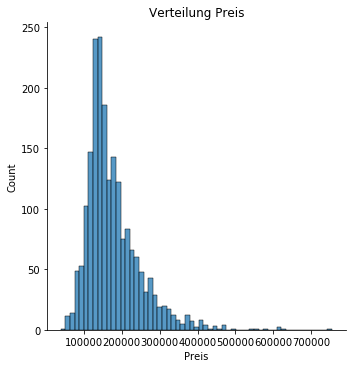

In [91]:
plt.figure(figsize=(10, 7))
sns.displot(data, x='Preis')
plt.title('Verteilung Preis')

#### Erkenntnis - Preis vs Quadratmeter
Man sieht deutlich die Tendenz, dass je mehr Quadradmeter ein Haus hat, desto höher ist der Preis. Allerdings gibt es ein paar Ausreißer, die entweder besonders teuer sind (bei um die 250 qm und 600000 Preiseinheiten), oder sehr günstig.

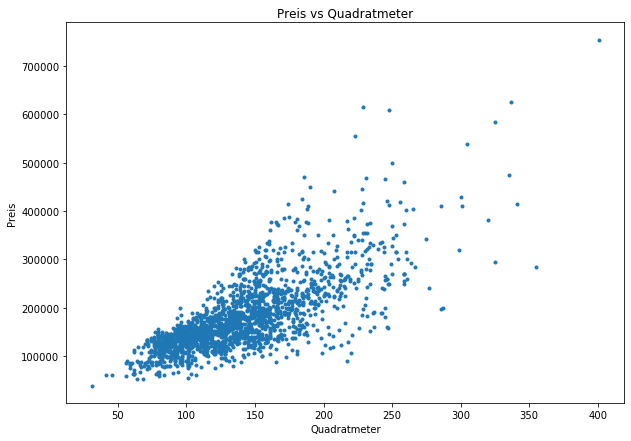

In [92]:
plt.figure(figsize=(10, 7))

plt.scatter(data['Wohnflche in qm'],data['Preis'], marker =".")
plt.title("Preis vs Quadratmeter")
plt.xlabel("Quadratmeter")
plt.ylabel("Preis")
plt.show()

#### Erkenntnisse Grundstückgröße vs Preis
Es lässt sich nicht wirklich eine signifikante Abhängigkeit zwischen Grundstücksgröße und Preis erkennen.

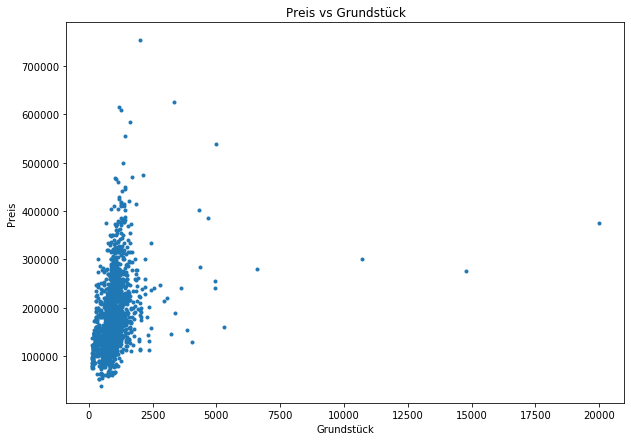

In [93]:
plt.figure(figsize=(10, 7))
plt.scatter(data['Grundstück in qm'],data['Preis'], marker =".")
plt.title("Preis vs Grundstück")
plt.xlabel("Grundstück")
plt.ylabel("Preis")
plt.show()

#### Erkenntnis - Preis vs. Bezirk
Der teuerste Stadtteil ist East End, weil dort das teuerste Haus im Datensatz steht und der Bezirk den höchsten Medianpreis hat.  
Der unbliebteste Stadtteil ist Paris Island mit dem niedrigsten Median.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


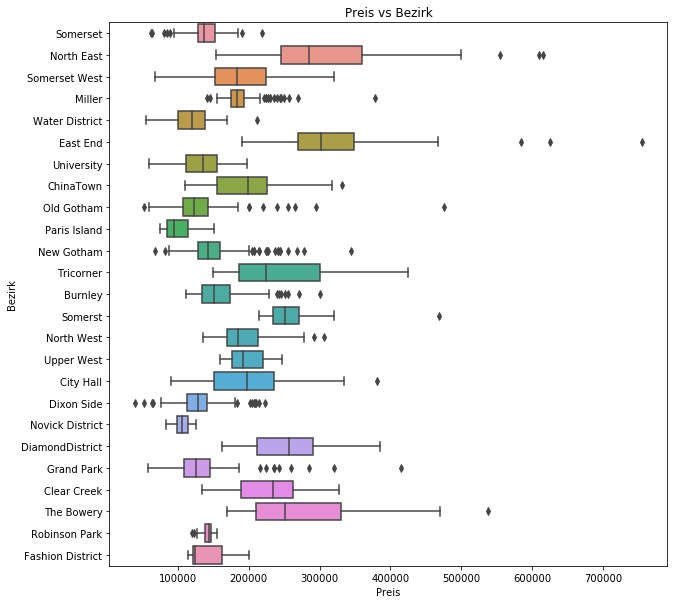

In [8]:
plt.figure(figsize=(10, 10))
plt.title("Preis vs Bezirk")
plt.xlabel("Preis")
plt.ylabel("Bezirk")
sns.boxplot(data['Preis'], data['Bezirk'])

#### Erkenntnis - Steigung vs. Preis
Hier kann keine eindeutige Auswirkung auf den Preis abgelesen werden. Das zweite Diagramm zeigt außerdem, dass Stiegung sehr selten auftritt. 

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


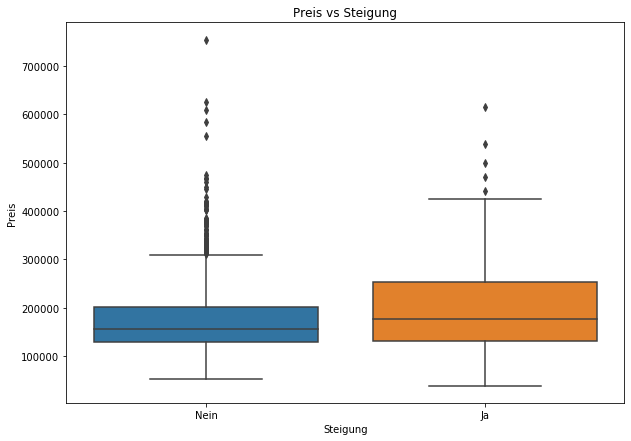

In [94]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Steigung'], data['Preis'])
plt.title("Preis vs Steigung")
plt.xlabel("Steigung")
plt.ylabel("Preis")
plt.show()

Text(12.199600694444456, 0.5, 'Bezirk')

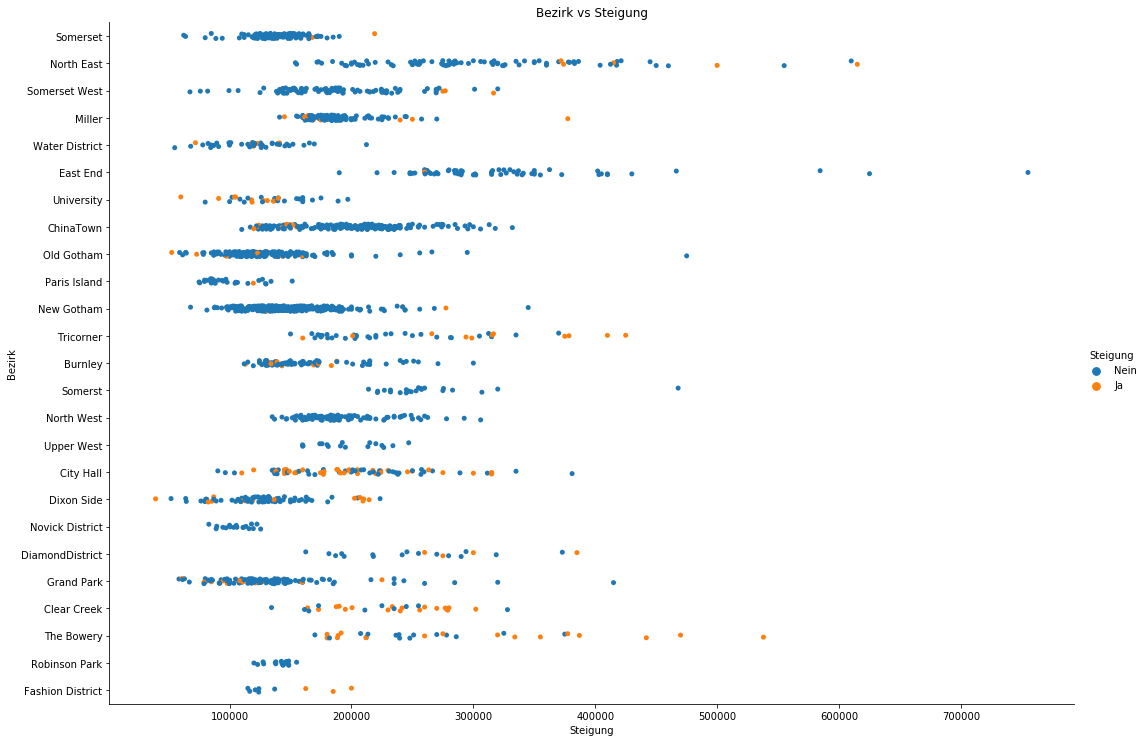

In [95]:
sns.catplot(x = "Preis", y='Bezirk', data=data, hue='Steigung', kind="strip", height=10, aspect=1.5)
plt.title("Bezirk vs Steigung")
plt.xlabel("Steigung")
plt.ylabel("Bezirk")

#### Erkenntnis - Schlafzimmer vs Preis
Sehr auffällig ist, dass im Datensatz sieben Häuser keine Schlafzimmer haben. Das ist vermutlich ein Fehler.  
Darüberhinaus kann gesagt werden, dass mehr als vier Schlafzimmer den Preis nicht steigern. Am besten sind Häuser mit ein bis vier Schlafzimmer.  
Die Unterschiede sind klein. 

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


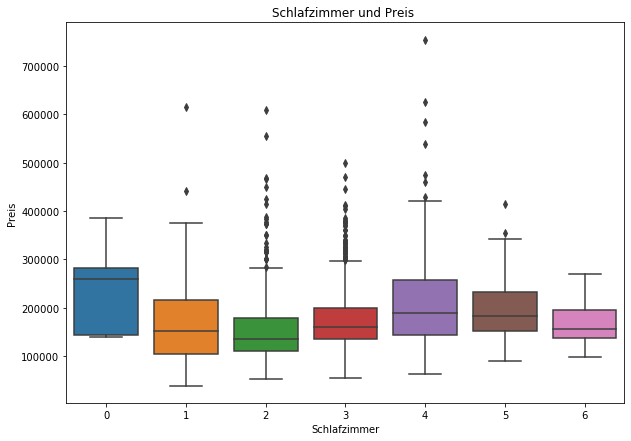

In [96]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Schlafzimmer'],data['Preis'])
plt.title("Schlafzimmer und Preis ")
plt.xlabel("Schlafzimmer")
plt.ylabel("Preis")
plt.show()


#### Erkenntnis - Preis vs Räume
Mehr Räume ziehen einen höheren Preis nach sich. Auch wenn angemerkt werden muss, dass ab 10 Räumen der Preis sehr stark variert und dadurch keine konkrete Korrelation mehr gegeben ist.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Preis vs Räume')

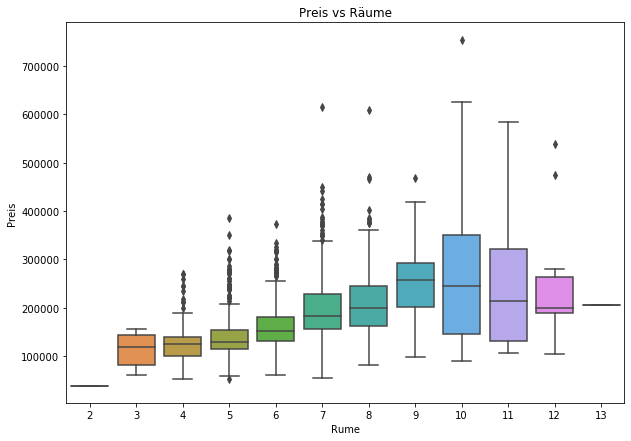

In [97]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Rume'],data['Preis'])
plt.title("Preis vs Räume")
#plt.xticks(np.arange(2, 14, 1))

#### Erkenntnis - Preis vs Lage
Wenn ein Haus an der Straße oder an der Bahn liegt, ist der Preis unterdurchschnttlich. Wenn ein Sportzentrum oder eine Grünanlage in der Nähe liegt, ist der Preis eher überdurchscnittlich. Allerdings können auch teurere Häuser in einer normalen Lage liegen. 

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


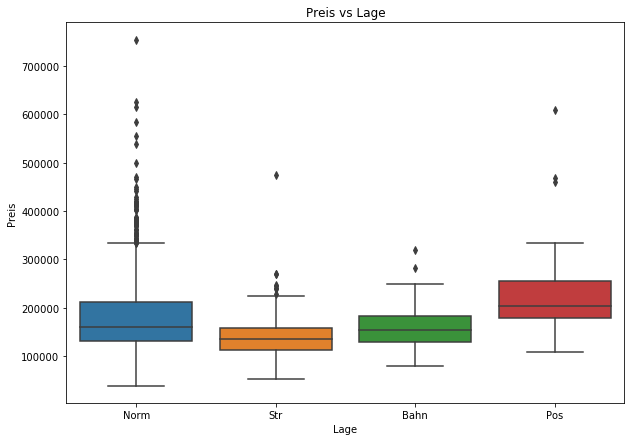

In [98]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Lage'],data['Preis'])
plt.title("Preis vs Lage")
plt.xlabel("Lage")
plt.ylabel("Preis")
plt.show()

#### Erkenntnis - Klimaanlage vs Preis
Eine vorhandene Klimaanlage steigert den Preis deutlich. 

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


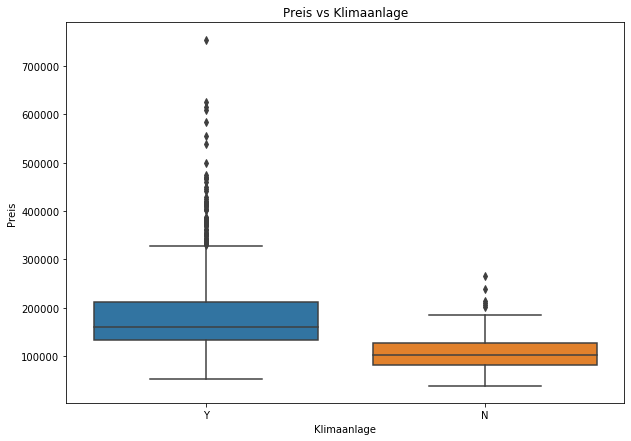

In [99]:
plt.figure(figsize=(10, 7))
plt.title("Preis vs Klimaanlage")
plt.xlabel("Klimaanlage")
plt.ylabel("Preis")
sns.boxplot(data['Klimaanlage'],data['Preis'])

#### Erkenntnis - Verkaufsmonat vs Preis
Man kann keinen nachweisbaren Einfluss des Verkaufsmonat auf den Preis ablesen. 

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


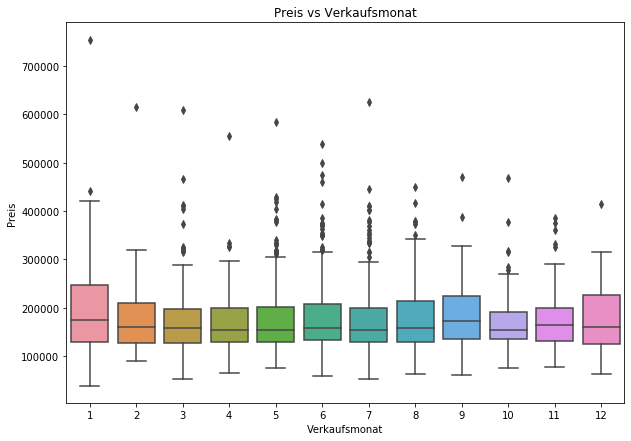

In [100]:
plt.figure(figsize=(10, 7))
plt.title("Preis vs Verkaufsmonat")
plt.xlabel("Verkaufsmonat")
plt.ylabel("Preis")
sns.boxplot(data['Verkaufsmonat'],data['Preis'])

#### Erkenntnis - Verkaufsjahr vs Preis
Man kann keinen nachweisbaren Einfluss des Verkaufsjahrs auf den Preis ablesen.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


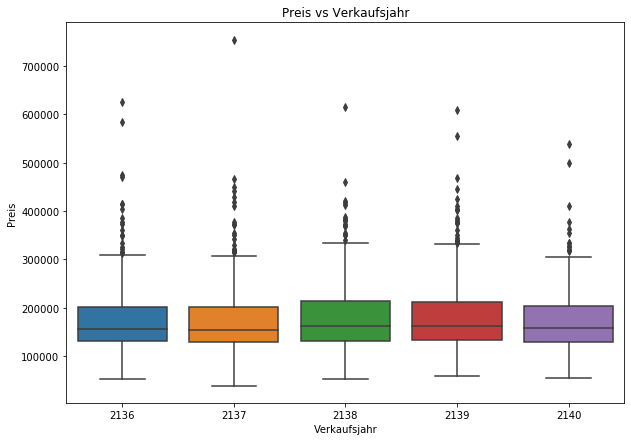

In [101]:
plt.figure(figsize=(10, 7))
# plt.xticks(np.arange(2136, 2141, 1))
sns.boxplot(data['Verkaufsjahr'],data['Preis'])
plt.title("Preis vs Verkaufsjahr")
plt.xlabel("Verkaufsjahr")
plt.ylabel("Preis")
plt.show()

#### Erkenntnis - Garagentyp vs Preis
Der Unterschied zwischen keiner Garage und CarPort ist sehr gering.  
Eine eingebaute Garage hebt den Hauspreis deutlich. Außerdem lohnt es sich eine Garage noch anzubauen, da damit der Preis steigt.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


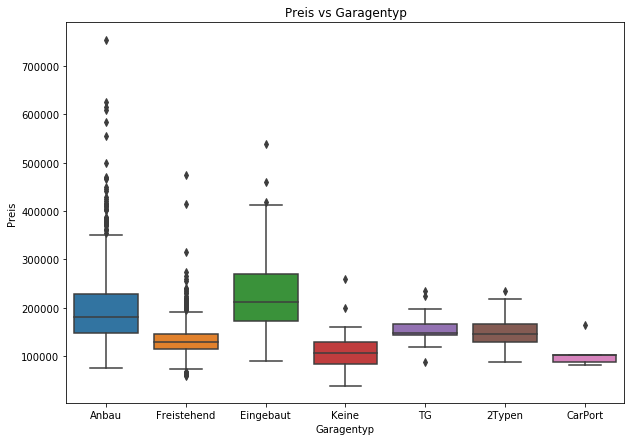

In [102]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Garage Typ'],data['Preis'])
plt.title("Preis vs Garagentyp")
plt.xlabel("Garagentyp")
plt.ylabel("Preis")
plt.show()

#### Erkenntnis Zustand vs Preis
Ein durchschnittlicher Zustand zieht den höchsten Preis nach sich. Logisch betrachtet, hat der Zustand in diesem Datensatz keinen Einfluss auf den Preis.  
Man kann jedoch festhalten, dass ein Haus mit durchschnittlichem bzw. überdurchschnittlichem Zustand einen höheren Preis hat, als unterdurchschnittliche Häuser.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


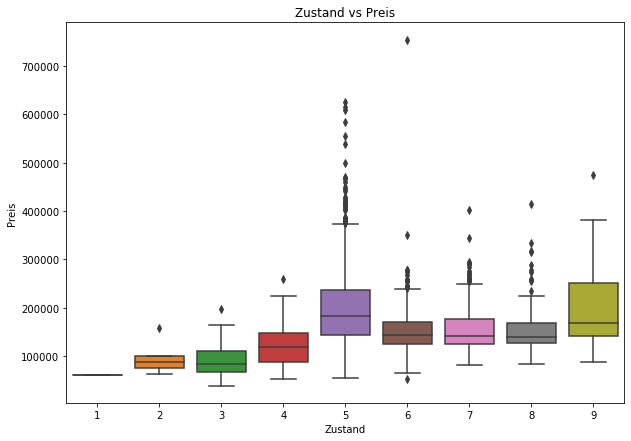

In [18]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Zustand'],data['Preis'])
plt.title("Zustand vs Preis")
plt.xlabel("Zustand")
plt.ylabel("Preis")
plt.show()

#### Erkenntnisse - Grundstücksform vs Preis
Die Grundstücksform hat keinen signifikanten Einfluss auf den Preis.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


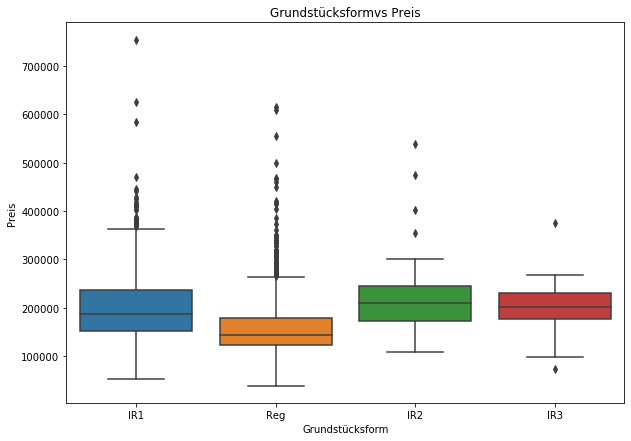

In [19]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Grundstücksform'],data['Preis'])
plt.title("Grundstücksformvs Preis")
plt.xlabel("Grundstücksform")
plt.ylabel("Preis")
plt.show()

#### Erkenntnisse - Bebauungsdichte vs Preis
Eine niedrige Bebauungsdichte zieht einen deutlich höheren Preis nach sich als höhere Bebauungsdichten.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


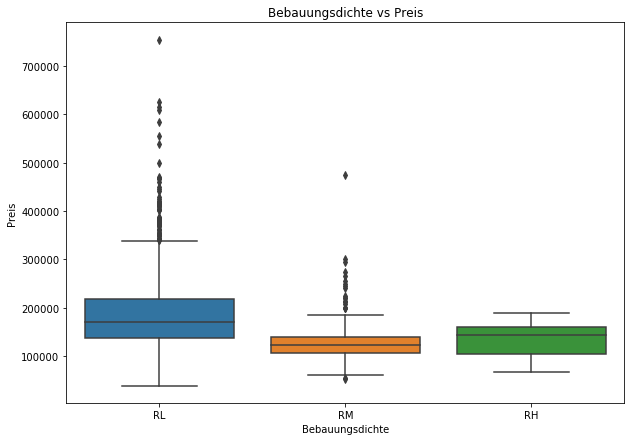

In [20]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Zone'],data['Preis'])
plt.title("Bebauungsdichte vs Preis")
plt.xlabel("Bebauungsdichte")
plt.ylabel("Preis")
plt.show()

#### Erkenntnisse Haustyp vs Preis
Wenig überraschend sind die Einfamilienhäuser und die Reihenendhäuser die Häuser mit höheren Preisen. Die Ausreißer bei den Einfamilienhäusern lassen sich durch größere Wohnfäche oder die Lage erklären.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


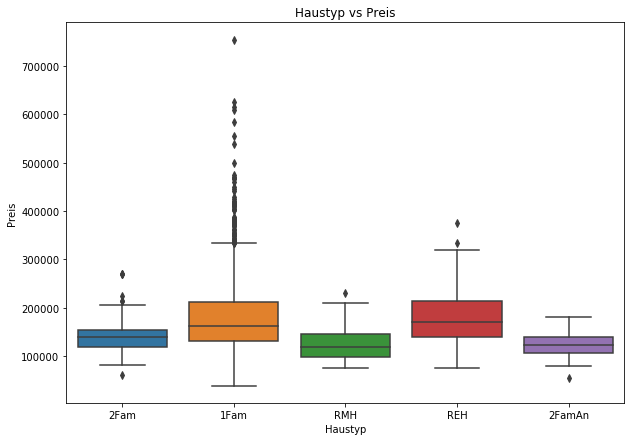

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Typ'],data['Preis'])
plt.title("Haustyp vs Preis")
plt.xlabel("Haustyp")
plt.ylabel("Preis")
plt.show()

#### Erkenntnisse - Fassadenzustand vs Preis
Durchschnittliche bzw. überdurchschnittliche Fassaden treiben den Preis nach oben.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


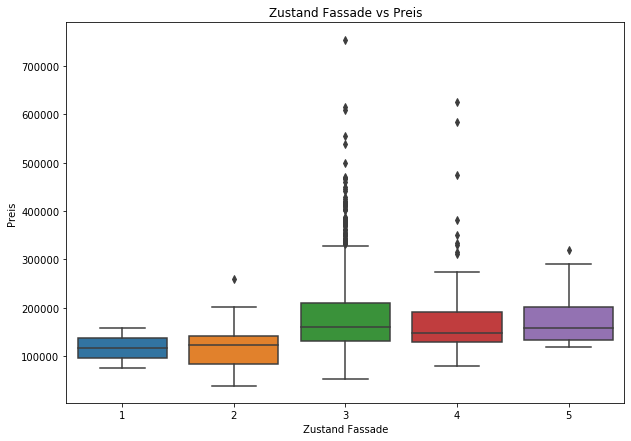

In [22]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Zustand Fassade'],data['Preis'])
plt.title("Zustand Fassade vs Preis")
plt.xlabel("Zustand Fassade")
plt.ylabel("Preis")
plt.show()

#### Erkenntnisse - Pool Zustand vs Preis
Eine positive Auswirkung auf den Preis hat ein Pool nur, wenn dessen Zustand sehr gut ist.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


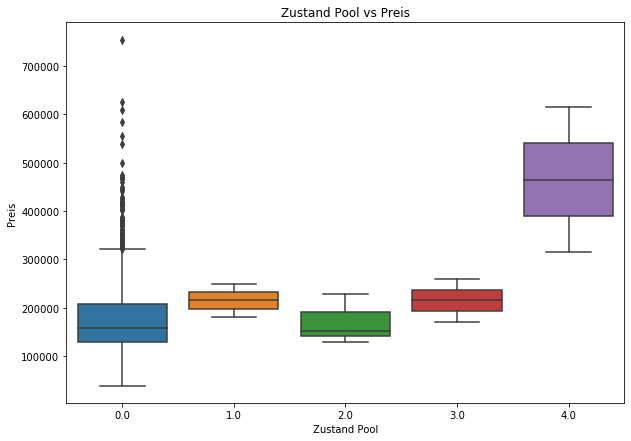

In [23]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['Pool'],data['Preis'])
plt.title("Zustand Pool vs Preis")
plt.xlabel("Zustand Pool")
plt.ylabel("Preis")
plt.show()

#### Erkenntnisse - Heizung vs Preis
Klar zu erkennen ist, dass die Art der Heizung kaum als Kriterium für den Preis genutzt werden kann, weil eine deutliche Mehrheit der Häuser Gasheizungen mit Heißluftgebläse haben.  
Die Heizungsart ist damit schlicht nicht aussagekräftig.  
Eher entscheident ist die Heizungsqualität: Häuser mit besserer Heizung erzielen höhere Preise.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Preis vs Heizung')

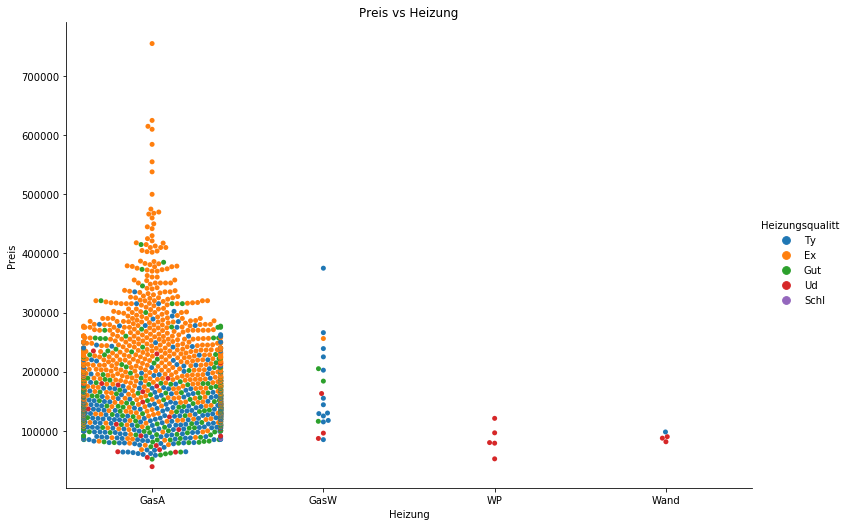

In [24]:
sns.catplot(x = "Heizung", y='Preis', data=data, hue='Heizungsqualitt', kind="swarm", height=7, aspect=1.5)
plt.title("Preis vs Heizung")

#### Erkenntnisse - Küche vs Preis
Klar zu erkennen ist, dass die Anzahl der Küchen kaum als Kriterium für den Preis genutzt werden kann, weil eine deutliche Mehrheit der Häuser nur eine Küche hat.  
Die Küchenanzahl ist damit schlicht nicht aussagekräftig.  
Eher entscheident ist die Küchenqualität: Sie hat einen positiven Einfluss auf den Preis.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Preis vs Küche')

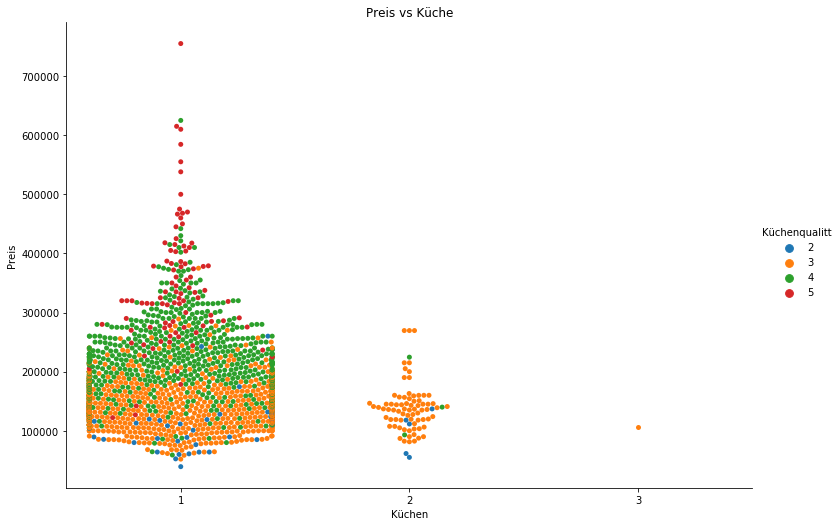

In [25]:
sns.catplot(x = "Küchen", y='Preis', data=data, hue='Küchenqualitt', kind="swarm", height=7, aspect=1.5)
plt.title("Preis vs Küche")

#### Ausreißer
Die meisten der numerischen Attribute besitzen Ausreißer (siehe Definition Ausreißer nach Boxplot-Diagramm).  
In der Einzelansicht, ist jedoch nicht erkenntlich, welche dieser Punkte tatsächliche Fehler sind und welche nur logisch nachvollziehbar außerhalb 1,5*IQR liegen. Bei den meisten Punkten handelt es sich um Werte, die keine Fehler sind, und nur auf Basis der Verteilung als statistische Ausreißer gesehen werden.  
Die Studenten haben deswegen entschieden, Ausreißer vorerst nicht zu entfernen, oder sie anders zu behandeln.

IQR
Grundstück in qm         376.25
Zustand                    1.00
Gebaut                    43.00
Renoviert                 37.00
Zustand Fassade            0.00
Kellerflche in qm         43.00
Erster Stock in qm        44.00
Zweiter Stock in qm       65.00
Wohnflche in qm           59.00
Schlafzimmer               1.00
Küchen                     0.00
Küchenqualitt              1.00
Rume                       2.00
Garagenkapazitt            1.00
Pool                       0.00
Verkaufsmonat              3.00
Verkaufsjahr               2.00
Preis                  77000.00
dtype: float64

"Ausreißer" pro Spalte


Zustand Fassade        283
Zustand                186
Kellerflche in qm       94
Grundstück in qm        85
Küchen                  83
Preis                   83
Verkaufsmonat           66
Schlafzimmer            57
Wohnflche in qm         41
Erster Stock in qm      35
Rume                    27
Garagenkapazitt         13
Pool                     9
Gebaut                   8
Zweiter Stock in qm      5
Küchenqualitt            0
Verkaufsjahr             0
Renoviert                0
dtype: int64

Text(0.5, 1.0, 'Ausreißer')

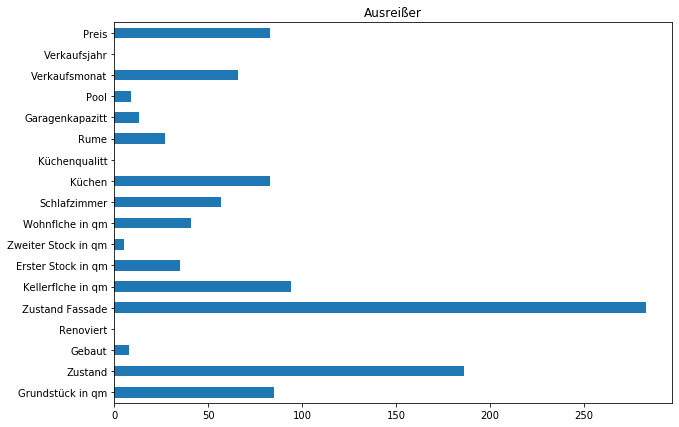

In [103]:
# select only columns with number as datatype
data_n = data.select_dtypes(exclude='object')

Q1 = data_n.quantile(0.25)
Q3 = data_n.quantile(0.75)
IQR = Q3 - Q1
print("IQR")
print(IQR)
print()

print(""""Ausreißer" pro Spalte""")
ausreiser = ((data_n < (Q1 - 1.5 * IQR)) |(data_n > (Q3 + 1.5 * IQR))).sum()
display(ausreiser.sort_values(ascending=False))

# Plot
plt.figure(figsize=(10, 7))
ausreiser.plot(kind="barh")
plt.title("Ausreißer")

#### Erkenntnis - Korrelationen
Am stärksten positiv korrelieren die Attribute Räume und Wohnfläche miteinander. Darüber hinaus ist zu sehen, dass auch Wohnfläche und Preis korrelieren.  
Verwunderlich ist, dass das Baujahr negativ mit dem Zustand korreliert, was bedeutet, dass neuere Häuser einen tendenziell schlechteren Zustand haben. 

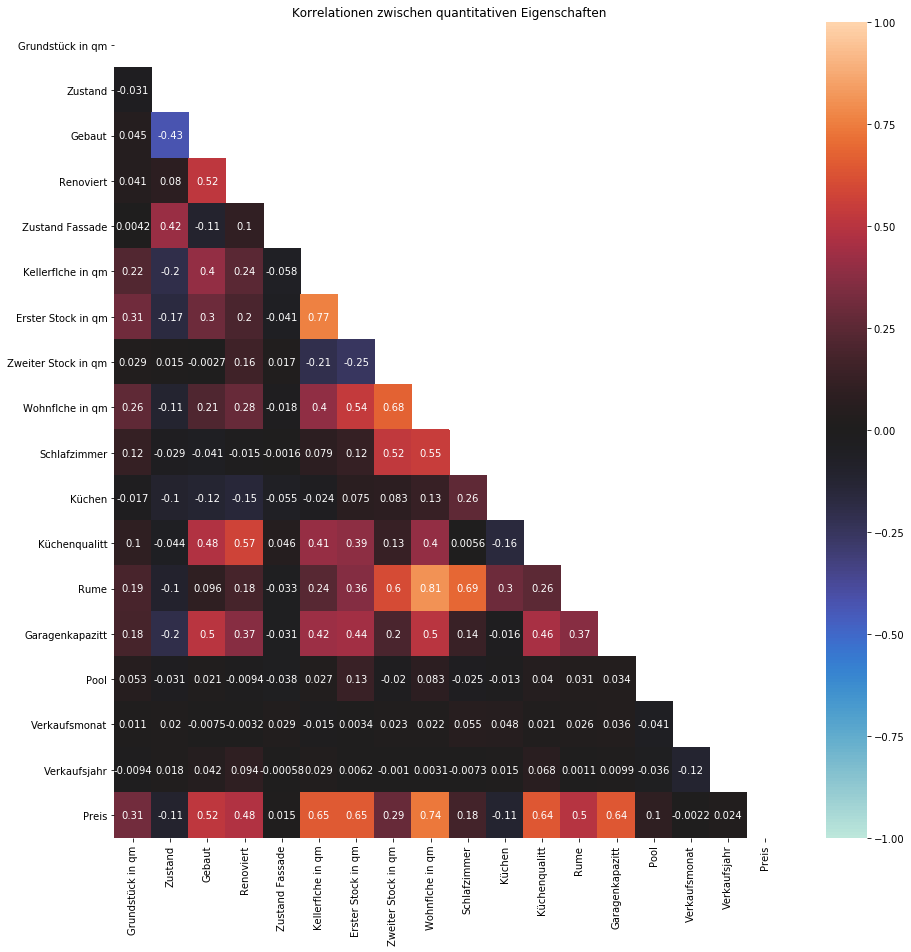

In [104]:
plt.figure(figsize=(15, 15))
plt.title("Korrelationen zwischen quantitativen Eigenschaften")
corr = data.select_dtypes(exclude='object').corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, mask=mask, annot=True)

<a id="vis_zustand"></a>
## Diagramme für die Zustandsvorhersage

### Datentransformation
Die Daten sind stark unbalanciert, deswegen werden die unterrepräsentierten Datensätze over-sampled.

Text(0.5, 1, 'Zustand Verteilung')

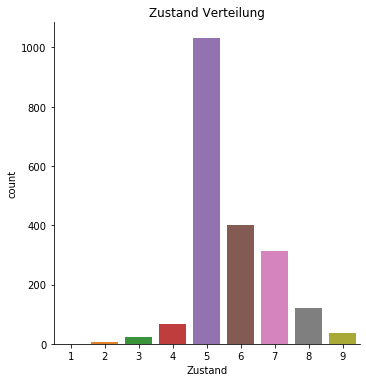

In [105]:
sns.catplot(x="Zustand", kind='count', data=data)
plt.title("Zustand Verteilung")

In [106]:
data_s = data
ros = RandomOverSampler(random_state=123, sampling_strategy={1:30,2:150, 3:350, 4:400}) # [1, 2, 3, 4, 5, 6, 11, 12, 13, 21])
X, y = ros.fit_resample(data_s.loc[:, data_s.columns != 'Zustand'], data_s['Zustand'])


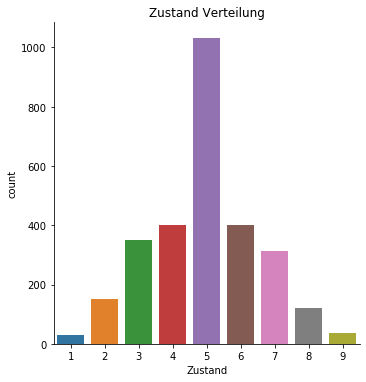

In [107]:
data_s = pd.concat([X,y], axis=1)
sns.catplot(x="Zustand", kind='count', data=data_s)
plt.title("Zustand Verteilung")
data_Z = data_s

### Erkenntnisse Grundstückgröße vs Zustand
Es lässt sich nicht eine signifikante Abhängigkeit zwischen Grundstücksgröße und Preis erkennen.

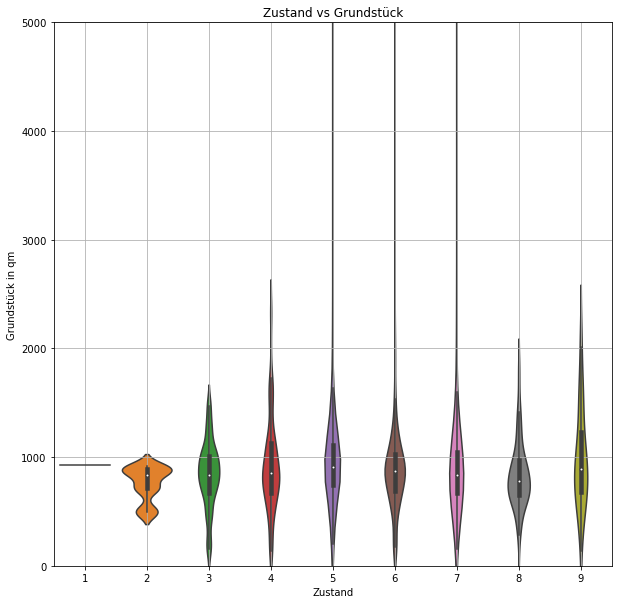

In [31]:
plt.figure(figsize=(10, 10))
plt.ylim(0,5000)
sns.violinplot(x="Zustand", y='Grundstück in qm', data=data_Z)
plt.grid()
plt.title("Zustand vs Grundstück")
plt.show()

### Erkenntnis - Zustand vs. Bezirk
Der Bezirk 'University' hat nach dem Median die Häußer mit den schlechtesten Zustand. 

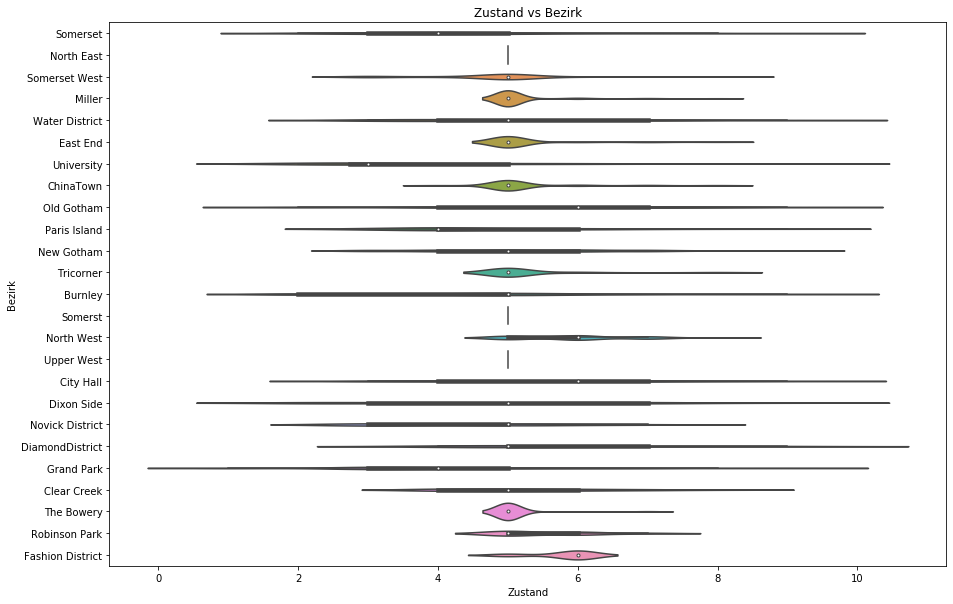

In [32]:
plt.figure(figsize=(15, 10))
plt.title("Zustand vs Bezirk")

sns.violinplot(x="Zustand", y="Bezirk", data=data_Z)

### Erkenntnis - Steigung vs. Zustand
Hier kann keine eindeutige Auswirkung auf den Zustand abgelesen werden. Aus der Daten Exploration zum Preis wissen wir, dass Steigung generell sehr selten auftritt.

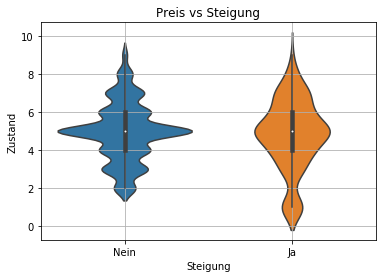

In [33]:
sns.violinplot(x="Steigung", y="Zustand", data=data_Z)
plt.title("Preis vs Steigung")
plt.grid()
plt.show()

### Erkenntnis - Klimaanlage vs Zustand
Eine vorhandene Klimaanlage korreliert mit einem höheren Zustand.

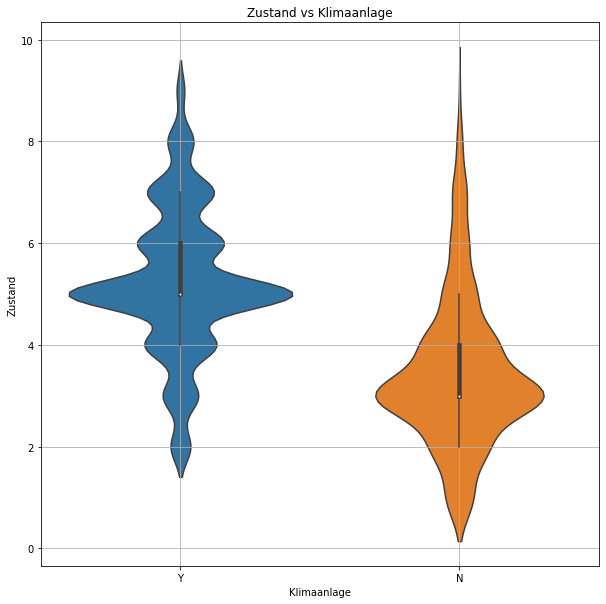

In [34]:
plt.figure(figsize=(10, 10))
plt.title("Zustand vs Klimaanlage")
plt.xlabel("Klimaanlage")
sns.violinplot(x="Klimaanlage", y="Zustand", data=data_Z)
plt.grid()

### Erkenntnis - Garagentyp vs Preis
Der Besitz einer Garage korreliert mit einem höheren Zustand. Einen Ausreißer bilden Häuser mit unterschiedlichen Garagen. 

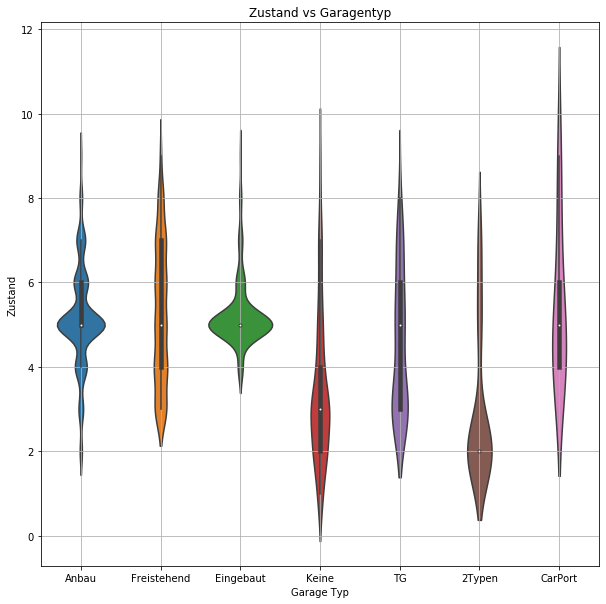

In [35]:
plt.figure(figsize=(10, 10))
sns.violinplot(x="Garage Typ", y="Zustand", data=data_Z)
plt.grid()
plt.title("Zustand vs Garagentyp")
plt.show()

### Erkenntnisse - Grundstücksform vs Zustand
Eine stark  irreguläre Grundstücksform korreliert mit einem unterdurchschnittlichen Zustand. 

Text(0.5, 1.0, 'Grundstücksform und Zustand')

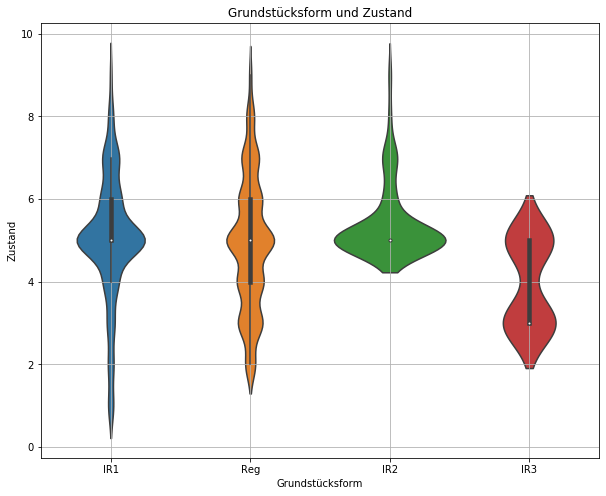

In [36]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Grundstücksform", y="Zustand", data=data_Z)
plt.grid()
plt.title("Grundstücksform und Zustand")

### Erkenntnisse - Bebauungsdichte vs Zustand
Eine hohe Bebauungsdichte korreliert mit einem niedrigeren Zustand.

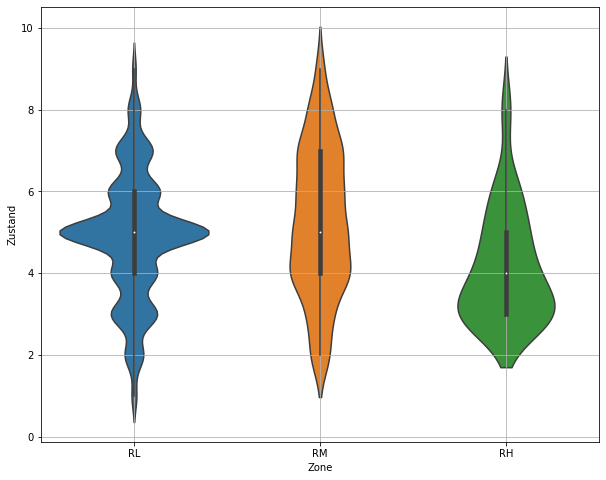

In [37]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Zone", y="Zustand", data=data_Z)
plt.grid()

### Erkenntnisse Haustyp vs Zustand
Ein Reihenmittelhaus hat durchschnittlich den höchsten Zustand.

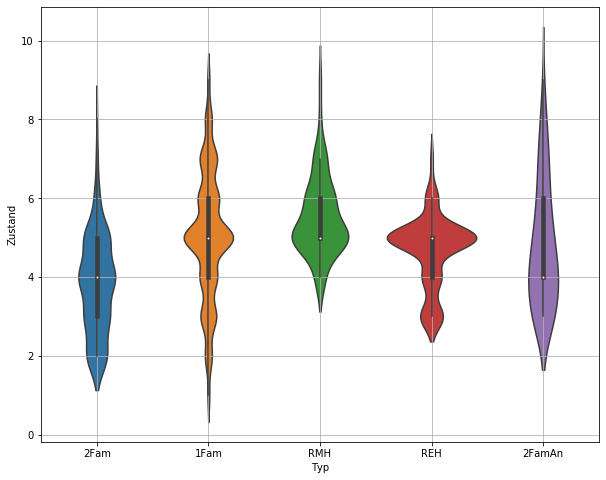

In [38]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Typ", y="Zustand", data=data_Z)
plt.grid()

### Erkenntnisse - Pool Zustand vs Zustand
Der Student ist sich durchaus darüber bewusst, dass es kritisch sein könnte, zwei Zustandswerte miteinander zu vergleichen.  
Der Pool Zustand korreliert nicht positiv mit dem Zustand.

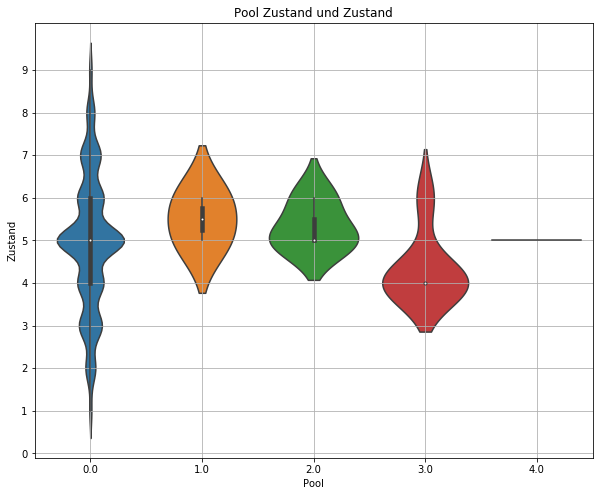

In [39]:
plt.figure(figsize=(10, 8))

sns.violinplot(x="Pool", y="Zustand", data=data_Z)
plt.yticks(np.arange(0, 10, step=1))
plt.title("Pool Zustand und Zustand")
plt.grid()
plt.show()

### Erkenntnisse - Fassade Zustand vs Zustand
Der Student ist sich durchaus darüber bewusst, dass es kritisch sein könnte, zwei Zustandswerte miteinander zu vergleichen.  
Der Fassadenzustand korreliert positiv mit dem Zustand.

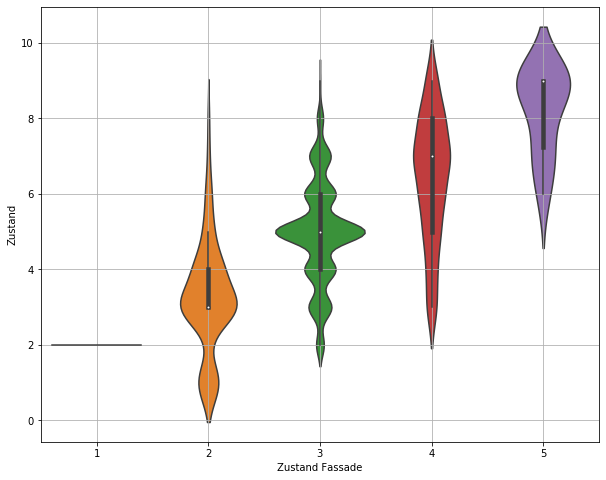

In [40]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Zustand Fassade", y="Zustand", data=data_Z)
plt.grid()
plt.show()

### Erkenntnisse - Küche Zustand vs Zustand
Der Student ist sich durchaus darüber bewusst, dass es kritisch sein könnte, zwei Zustandswerte miteinander zu vergleichen.  
Man kann eine leichte positive Korrelation zwischen der Küchenqualität und dem Zustand feststellen.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Preis vs Küche')

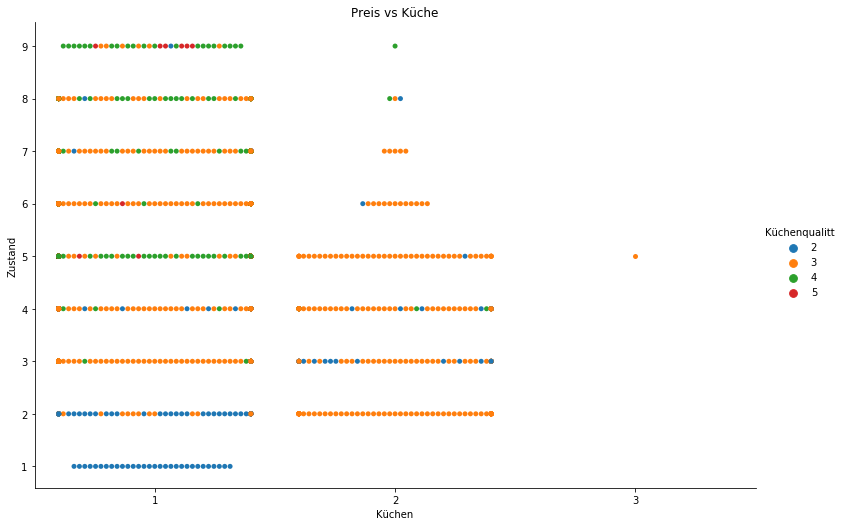

In [41]:
sns.catplot(x = "Küchen", y='Zustand', data=data_Z, hue='Küchenqualitt', kind="swarm", height=7, aspect=1.5)
plt.title("Preis vs Küche")

<a id="modelling"></a>
# Modelling

## Erkenntnisse
### Zusammenfassung Preis Modelling
Obwohl das lineare Regressionsmodell nicht perfekt ist, ist es in der Lage, etwa 87 % der Variation des Verkaufspreises einer Immobilie zu erklären, und ist auch in der Lage, den Verkaufspreis innerhalb von 24.935 vorherzusagen.  
Die weitere Untersuchung der Residuen dieses Modells ergab eine spezifische Schwäche dieses Modells bei der Vorhersage von Extremwerten. Konkret schien der ideale Bereich für Vorhersagen zwischen 90.000 und 225.000 zu liegen.  
  
Mit der Lasso und Ridge Regressionsmodell erzielten wir ein ähnliches Ergebnis. Dies deutet, darauf hin, dass für die lineare und Ridge Regression die wichtigsten Werte als Feature verwendet wurden.  
  
Der Random Forest liegt mit seiner Performance genau zwischen den obigen Regressionsmodellen und dem Gradient Boosting Regressor.  
Er erklärt 88,9 % der Varianz in den Daten und sagt den Preis auf 23.662 genau vorher.  
  
Der Gradient Boosting Regressor ist in der Lage etwa 90 % der Variation des Verkaufspreises einer Immobilie zu erklären. Das Modell kann den Verkaufspreis auf 21.325 genau vorhersagen und ist damit das genauste Modell.

### Zusammenfassung Zustand Modelling
Die Leistung des Models ist sehr schwach. Die Accuracy ist mit 0,59 nur knapp über dem Zufall.   
Das Faktum, dass hier der Gradient Boosting Classifier, das im Moment beste Modell abseits von Neuronalen Netzen, genutzt wurde, lässt darauf schließen, dass das Ziel von den Hauseigenschaften auf den Zustand schließen zu können, nicht erfüllt werden kann.  
Anders ausgedrückt, aus den Daten kann kein Verständnis darüber erlangt werden, von welchen Eigenschaften der Zustand abhängt.  
Die Ergebnisse des Modelling bestätigen die Beobachtungen aus der Data Exploration.

<a id="regression"></a>
## Modelling für Hauspreis
_Die Modeling Schritte für die Zustands-Klassifikation erfolgen im Anschluss._

## Fehlerhafte Daten entfernen
Es werden die sieben Häuser ohne Schlafzimmer gelöscht.

In [42]:
indices = data[data['Schlafzimmer'] == 0].index
print(indices)
modeling_data = data.drop(index=indices)
print(modeling_data.shape)

Int64Index([850, 939, 1069, 1095, 1381, 1526, 1975], dtype='int64')
(1993, 28)


## Encoding
Wie weiter oben erwähnt, sind einige Spalten Nominal- oder Ordinalskalen mit Strings. Diese müssen zu numerischen Werten transformiert werden.

In [43]:
# Zunächst wird im DataFrame abgespeichert, welche Werte generelle angenommen werden können.
# Diese Zuteilung ist notwendig, damit bei der One-hot Encoding auch wirklich alle Spalten generiert werden.

cat_columns = [c for c in modeling_data.columns if modeling_data[c].dtype == 'object']
cat_columns.remove('Heizungsqualitt')
cat_columns.remove('Steigung')
cat_columns.remove("Klimaanlage")

columns_val = {}
columns_val["Bezirk"] = modeling_data['Bezirk'].unique()
columns_val['Grundstücksform'] = ["Reg", "IR1", "IR2", "IR3"]
columns_val['Zone'] = ["RH", "RL", "RP", "RM"]
columns_val['Lage'] = ["Str", "Bahn", "Pos", "Norm"]
columns_val['Typ'] = ["1Fam", "2Fam", "2FamAn", "REH", "RMH"]
columns_val['Heizung'] = ["GasA", "GasW", "WP", "Wand"]
columns_val['Garage Typ'] = ["2Typen", "Anbau", "TG", "Eingebaut", "CarPort", "Freistehend", "Keine"]

for c in cat_columns:
    modeling_data[c] = modeling_data[c].astype(CategoricalDtype(columns_val[c]))

In [44]:
# Die Spalten Heizung, Klimaanlage und Steigung werden Label-encoded.
# Auf allen anderen notwendigen Spalten wird das One-Hot Encoding eingesetzt.

modeling_data_num = modeling_data
heizung_dict = {'Schl':1, 'Ud':2, 'Ty':3, 'Gut':4, 'Ex':5}
modeling_data_num['Heizungsqualitt'] = modeling_data_num.Heizungsqualitt.map(heizung_dict)

klima_dict = {'Y':1, 'N':0}
modeling_data_num['Klimaanlage'] = modeling_data_num.Klimaanlage.map(klima_dict)

steigung_dict = {'Ja':1, 'Nein':0}
modeling_data_num['Steigung'] = modeling_data_num.Steigung.map(steigung_dict)


modeling_data_num = pd.get_dummies(modeling_data_num)
print(modeling_data_num.shape)

(1993, 74)


## Daten in Features und Output trennen (für Preis-Regression)

In [45]:
# Aufteilung für Lineare Regression, Ridge Regression, Random Forest und Gradient Boosting Regressor
y = modeling_data_num['Preis']
## Selektion der Feature, auf Grundlage der Lasso Regression siehe unten
columns = ['Grundstück in qm', 'Steigung', 'Zustand', 'Gebaut', 'Renoviert',
       'Zustand Fassade', 'Kellerflche in qm', 'Heizungsqualitt',
       'Klimaanlage', 'Erster Stock in qm', 'Zweiter Stock in qm',
       'Wohnflche in qm', 'Schlafzimmer', 'Küchen', 'Küchenqualitt', 'Rume',
       'Garagenkapazitt', 'Pool', 'Verkaufsmonat', 'Verkaufsjahr',
       'Grundstücksform_Reg', 'Grundstücksform_IR1', 'Grundstücksform_IR2',
       'Grundstücksform_IR3', 'Bezirk_Somerset', 'Bezirk_North East',
       'Bezirk_Somerset West', 'Bezirk_Miller', 'Bezirk_Water District',
       'Bezirk_East End', 'Bezirk_University', 'Bezirk_ChinaTown',
       'Bezirk_Old Gotham', 'Bezirk_Paris Island', 'Bezirk_New Gotham',
       'Bezirk_Tricorner', 'Bezirk_Burnley', 'Bezirk_Somerst',
       'Bezirk_North West', 'Bezirk_Upper West', 'Bezirk_City Hall',
       'Bezirk_Dixon Side', 'Bezirk_Novick District', 'Bezirk_DiamondDistrict',
       'Bezirk_Grand Park', 'Bezirk_Clear Creek', 'Bezirk_The Bowery',
       'Bezirk_Robinson Park', 'Bezirk_Fashion District', 'Zone_RH', 'Zone_RL',
       'Zone_RP', 'Zone_RM', 'Lage_Str', 'Lage_Bahn', 'Lage_Pos', 'Lage_Norm',
       'Typ_1Fam', 'Typ_2Fam', 'Typ_2FamAn', 'Typ_REH', 'Typ_RMH',
       'Heizung_GasA', 'Heizung_GasW', 'Heizung_WP', 'Heizung_Wand',
       'Garage Typ_2Typen', 'Garage Typ_Anbau', 'Garage Typ_TG',
       'Garage Typ_Eingebaut', 'Garage Typ_CarPort', 'Garage Typ_Freistehend',
       'Garage Typ_Keine']
X = modeling_data_num[columns]

In [46]:
# Aufteilung für Lasso Regression
y_L = modeling_data_num['Preis']
X_L = modeling_data_num.drop(columns =['Preis'])

columns_L = X_L.columns

## Standardisieren

In [47]:
std = StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=columns)

std_L = StandardScaler()
X_L = pd.DataFrame(std_L.fit_transform(X_L), columns=columns_L)

## Daten in Traings- und Testdaten trennen
Die Daten werden in Trainings- und Testdaten getrennt.   
10 Prozent der Daten werden zu Testdaten und werden erst bei der Evaluation genutzt.  
Die Validerung findet nicht durch ein festes Validierungsset statt, sondern wird mittels Cross-Validation durchgeführt.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=123)

X_L_train,X_L_test,y_L_train,y_L_test = train_test_split(X_L,y_L,test_size=0.1,random_state=123)


### Metriken

In [49]:
def validation(model, X_train, y_train):
    
    def neg_mean_absolute_percentage_error(model, X, y):
        y_pred = model.predict(X)
        return -np.mean(np.abs((y - y_pred) / y))
    
    return {'mean CV score': cross_val_score(model, X_train, y_train).mean(),
            "mean CV MAPE ": -cross_val_score(model, X_train, y_train, scoring=neg_mean_absolute_percentage_error).mean(),
            "mean CV MSE  ": -cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error').mean(),
            "mean CV RMSE ": -cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error').mean(),
            "mean CV MAE  ": -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error').mean(),
            "mean CV R2   ": cross_val_score(model, X_train, y_train, scoring='r2').mean(),
            'mean CV Explained Variance': cross_val_score(model, X_train, y_train, scoring='explained_variance').mean(),
            "mean CV MAX  ": -cross_val_score(model, X_train, y_train, scoring='max_error').mean()
           }

### Lineare Regression

In [50]:
linReg = LinearRegression()

linReg.fit(X_train, y_train)

print(linReg.coef_)
print(linReg.intercept_)

[ 5.21086462e+03  1.97292490e+03  8.94592969e+03  1.38807632e+04
 -5.47864949e+02  9.36532213e+02  1.55099347e+04  1.07192106e+03
  9.17956539e+01  1.70842736e+04  1.92667629e+04  1.41423855e+04
 -9.06224331e+03 -2.78584420e+03  7.95092563e+03 -1.20320345e+03
  8.89253142e+03  1.98969265e+03 -7.89065045e+02 -7.17058904e+02
 -4.28495297e+16 -4.18843822e+16 -1.50275794e+16 -6.85910817e+15
 -1.44814508e+16 -1.25066613e+16 -1.30995868e+16 -1.42532431e+16
 -9.04384886e+15 -1.07326919e+16 -7.76850712e+15 -1.83324114e+16
 -1.70047542e+16 -7.28991229e+15 -2.31635632e+16 -8.94509218e+15
 -1.20917687e+16 -6.36073372e+15 -1.30995868e+16 -5.59848467e+15
 -1.18778292e+16 -1.25066613e+16 -5.91565635e+15 -5.91565635e+15
 -1.49244029e+16 -6.90782643e+15 -7.41264735e+15 -6.06779784e+15
 -4.08173355e+15  2.78978851e+15  1.15296725e+16 -6.63220587e+15
  1.13033509e+16 -7.40234246e+14 -4.45619994e+14 -3.94795614e+14
 -9.10887805e+14 -4.60687888e+15 -2.35833916e+15 -1.75356443e+15
 -3.25333312e+15 -2.12811

In [51]:
performance_linReg = validation(linReg, X_train, y_train)
pprint(performance_linReg)

{'mean CV score': 0.8764563682087865,
 'mean CV MAPE ': 0.10027013576995021,
 'mean CV MSE  ': 660990834.8597263,
 'mean CV RMSE ': 25643.923825097827,
 'mean CV MAE  ': 17362.089965128464,
 'mean CV R2   ': 0.8764563682087865,
 'mean CV Explained Variance': 0.8769838942899547,
 'mean CV MAX  ': 173285.9106604582}


#### Lasso Regression


Die Lasso und Ridge-Regression sind einige der einfachen Techniken zur Verringerung der Modellkomplexität und zur Vermeidung von Überanpassungen, die sich aus einer einfachen linearen Regression ergeben können. Die Lasso Regression führt selbständig eine Variablenselektion durch. Daher ist einen Vorauswahl nicht notwendig. 

In [52]:
lasso = LassoCV()
lasso.fit(X_L_train, y_L_train)

LassoCV()

In [53]:
y_pred_lasso = lasso.predict(X_L_test)
print(f'The number of features in this model is : {np.sum(lasso.coef_ != 0)}.')
performance_lasso = validation(lasso, X_L_train, y_L_train)
pprint(performance_lasso)
print("alpha",lasso.alpha_)


The number of features in this model is : 52.
{'mean CV score': 0.8776850318240722,
 'mean CV MAPE ': 0.09874528739461368,
 'mean CV MSE  ': 656033764.4270772,
 'mean CV RMSE ': 25526.58297149118,
 'mean CV MAE  ': 17166.44406530988,
 'mean CV R2   ': 0.8776850318240722,
 'mean CV Explained Variance': 0.8782447538412912,
 'mean CV MAX  ': 174522.42143101938}
alpha 271.4889515897414


In [54]:
lasso_coef = pd.DataFrame(lasso.coef_, X_L_train.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)
lasso_coef[lasso_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False)
print(lasso_coef.index)

Index(['Grundstück in qm', 'Steigung', 'Zustand', 'Gebaut', 'Renoviert',
       'Zustand Fassade', 'Kellerflche in qm', 'Heizungsqualitt',
       'Klimaanlage', 'Erster Stock in qm', 'Zweiter Stock in qm',
       'Wohnflche in qm', 'Schlafzimmer', 'Küchen', 'Küchenqualitt', 'Rume',
       'Garagenkapazitt', 'Pool', 'Verkaufsmonat', 'Verkaufsjahr',
       'Grundstücksform_Reg', 'Grundstücksform_IR1', 'Grundstücksform_IR2',
       'Grundstücksform_IR3', 'Bezirk_Somerset', 'Bezirk_North East',
       'Bezirk_Somerset West', 'Bezirk_Miller', 'Bezirk_Water District',
       'Bezirk_East End', 'Bezirk_University', 'Bezirk_ChinaTown',
       'Bezirk_Old Gotham', 'Bezirk_Paris Island', 'Bezirk_New Gotham',
       'Bezirk_Tricorner', 'Bezirk_Burnley', 'Bezirk_Somerst',
       'Bezirk_North West', 'Bezirk_Upper West', 'Bezirk_City Hall',
       'Bezirk_Dixon Side', 'Bezirk_Novick District', 'Bezirk_DiamondDistrict',
       'Bezirk_Grand Park', 'Bezirk_Clear Creek', 'Bezirk_The Bowery',
       'B

Wir ermitteln die Features, die bei der Lasso Regression tatsächlich verwendet wurden und verwenden diese für die lineare, ridge, Random Forest und gradient boost Regression.

#### Ridge Regression

In [55]:
ridge = RidgeCV()


In [56]:
performance_ridge = validation(ridge, X_train, y_train)
pprint(performance_ridge)

{'mean CV score': 0.8776140811056526,
 'mean CV MAPE ': 0.09959641350283183,
 'mean CV MSE  ': 654882418.0867586,
 'mean CV RMSE ': 25526.56933192788,
 'mean CV MAE  ': 17289.524612244633,
 'mean CV R2   ': 0.8776140811056526,
 'mean CV Explained Variance': 0.8781526398946269,
 'mean CV MAX  ': 172809.29059552387}


### Random Forests

In [57]:
## Hyperparameter tuning

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf = RandomizedSearchCV(RandomForestRegressor(random_state=123), random_grid, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=1, random_state=123)
clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.1min finished


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}


In [58]:
rafo = RandomForestRegressor(
 n_estimators= 200,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 110,
 bootstrap=False,
 random_state=123)

#rafo.fit(X_train, y_train)

performance_rafo = validation(rafo, X_train, y_train)
pprint(performance_rafo)

{'mean CV score': 0.8886508978021833,
 'mean CV MAPE ': 0.08874675261830349,
 'mean CV MSE  ': 596562643.2564083,
 'mean CV RMSE ': 24350.805783103337,
 'mean CV MAE  ': 15362.01498166397,
 'mean CV R2   ': 0.8886508978021833,
 'mean CV Explained Variance': 0.8889806741038381,
 'mean CV MAX  ': 174695.00525000002}


#### Gradient Boosting Tree Regressor

In [59]:
## Hyperparameter tuning

param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
              'n_estimators':[100,250,500,750,1000,1250,1500,1750],
              'max_depth':[2,3,4,5,6,7],
              'min_samples_split':[2,4,6,8,10,20,40,60,100], 
              'min_samples_leaf':[1,3,5,7,9],
              'max_features':[2,3,4,5,6,7],
              'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
}
clf = RandomizedSearchCV(GradientBoostingRegressor(random_state=123), param_grid, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=1, random_state=123)
clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.5s finished


{'subsample': 0.7, 'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 4, 'learning_rate': 0.05}


In [60]:
# weiteres händisches ausprobieren
gbr = GradientBoostingRegressor(subsample= 0.8,
 n_estimators= 1750,
 min_samples_split= 4,
 min_samples_leaf= 5,
 max_features= 3,
 max_depth= 3,
 learning_rate=0.05,
 random_state=123)

#gbr.fit(X_train, y_train)

performance_gbr = validation(gbr, X_train, y_train)
pprint(performance_gbr)

{'mean CV score': 0.9124686580498693,
 'mean CV MAPE ': 0.08009029479832752,
 'mean CV MSE  ': 462165955.61796445,
 'mean CV RMSE ': 21485.025374638702,
 'mean CV MAE  ': 14159.948409738008,
 'mean CV R2   ': 0.9124686580498693,
 'mean CV Explained Variance': 0.9126582837335875,
 'mean CV MAX  ': 141995.27092614575}


### Grafischer Vergleich der Modelle

Graphische Darstellung, wie gut die Modelle den Preis vorhersagen, verglichen mit dem tatsächlichen Preis.  
Ist eine große Streuung um die blaue Linie zusehen, weichen die Vorhersagen stärker vom tatsächlichen Preis ab.

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments wi

Text(0, 0.5, 'Vorausgesagter Preis  (y_pred)')

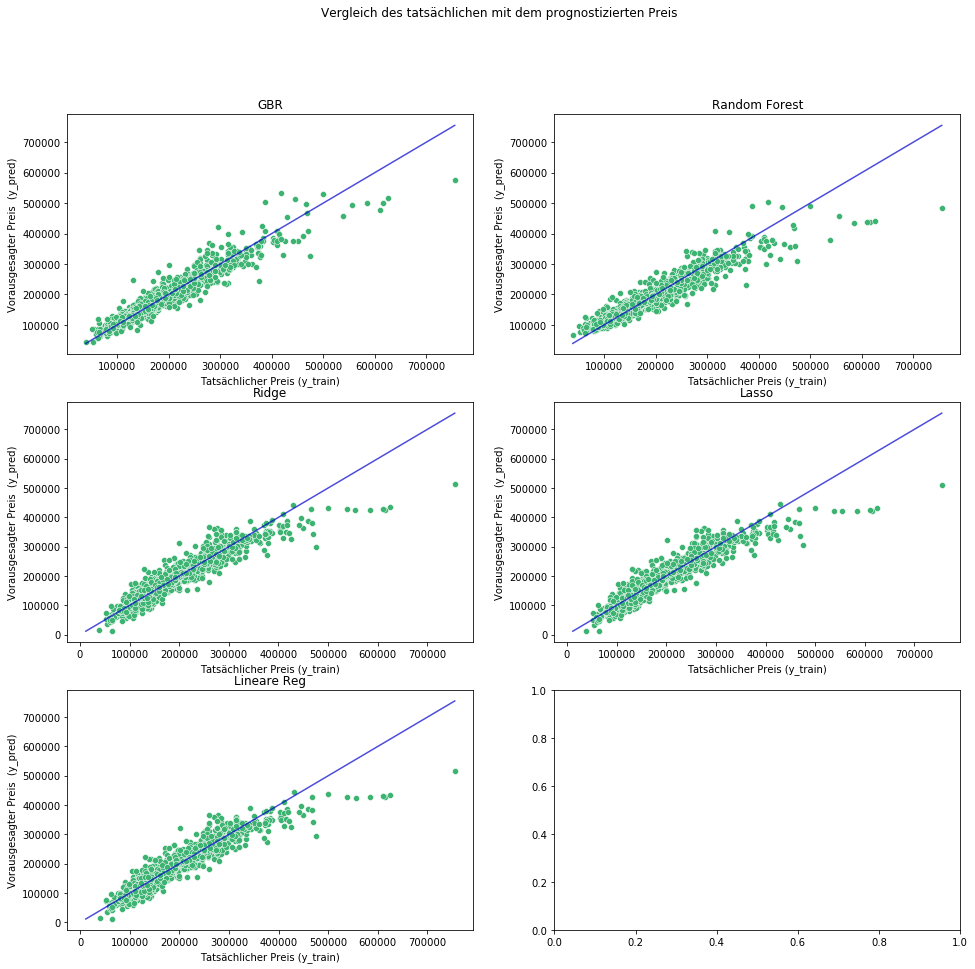

In [61]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, _))  = plt.subplots(3, 2, figsize = (16, 15))
fig.suptitle("Vergleich des tatsächlichen mit dem prognostizierten Preis")

y_pred_gbr = cross_val_predict(gbr, X_train, y_train)
sns.scatterplot(x = y_train, y = y_pred_gbr, color = 'mediumseagreen', ax=ax1)
ax1.set_title('GBR')
maxDist = max(max(y_pred_gbr), max(y_train)) 
minDist = min(min(y_pred_gbr), min(y_train)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7, ax=ax1) 
ax1.set_xlabel('Tatsächlicher Preis (y_train)')
ax1.set_ylabel('Vorausgesagter Preis  (y_pred)')

y_pred_rafo = cross_val_predict(rafo, X_train, y_train)
sns.scatterplot(x = y_train, y = y_pred_rafo, color = 'mediumseagreen', ax=ax2)
ax2.set_title('Random Forest')
maxDist = max(max(y_pred_rafo), max(y_train)) 
minDist = min(min(y_pred_rafo), min(y_train)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7, ax=ax2) 
ax2.set_xlabel('Tatsächlicher Preis (y_train)')
ax2.set_ylabel('Vorausgesagter Preis  (y_pred)')

y_pred_ridge = cross_val_predict(ridge, X_train, y_train)
sns.scatterplot(x = y_train, y = y_pred_ridge, color = 'mediumseagreen', ax=ax3)
ax3.set_title('Ridge')
maxDist = max(max(y_pred_ridge), max(y_train)) 
minDist = min(min(y_pred_ridge), min(y_train)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7, ax=ax3) 
ax3.set_xlabel('Tatsächlicher Preis (y_train)')
ax3.set_ylabel('Vorausgesagter Preis  (y_pred)')

y_pred_lasso = cross_val_predict(lasso, X_train, y_train)
sns.scatterplot(x = y_train, y = y_pred_lasso, color = 'mediumseagreen', ax=ax4)
ax4.set_title('Lasso')
maxDist = max(max(y_pred_lasso), max(y_train)) 
minDist = min(min(y_pred_lasso), min(y_train)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7, ax=ax4) 
ax4.set_xlabel('Tatsächlicher Preis (y_train)')
ax4.set_ylabel('Vorausgesagter Preis  (y_pred)')

y_pred_linReg = cross_val_predict(linReg, X_train, y_train)
sns.scatterplot(x = y_train, y = y_pred_linReg, color = 'mediumseagreen', ax=ax5)
ax5.set_title('Lineare Reg')
maxDist = max(max(y_pred_linReg), max(y_train)) 
minDist = min(min(y_pred_linReg), min(y_train)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7, ax=ax5) 
ax5.set_xlabel('Tatsächlicher Preis (y_train)')
ax5.set_ylabel('Vorausgesagter Preis  (y_pred)')

Vergleich der Performance Werte der Modelle.

(125000, 190000)

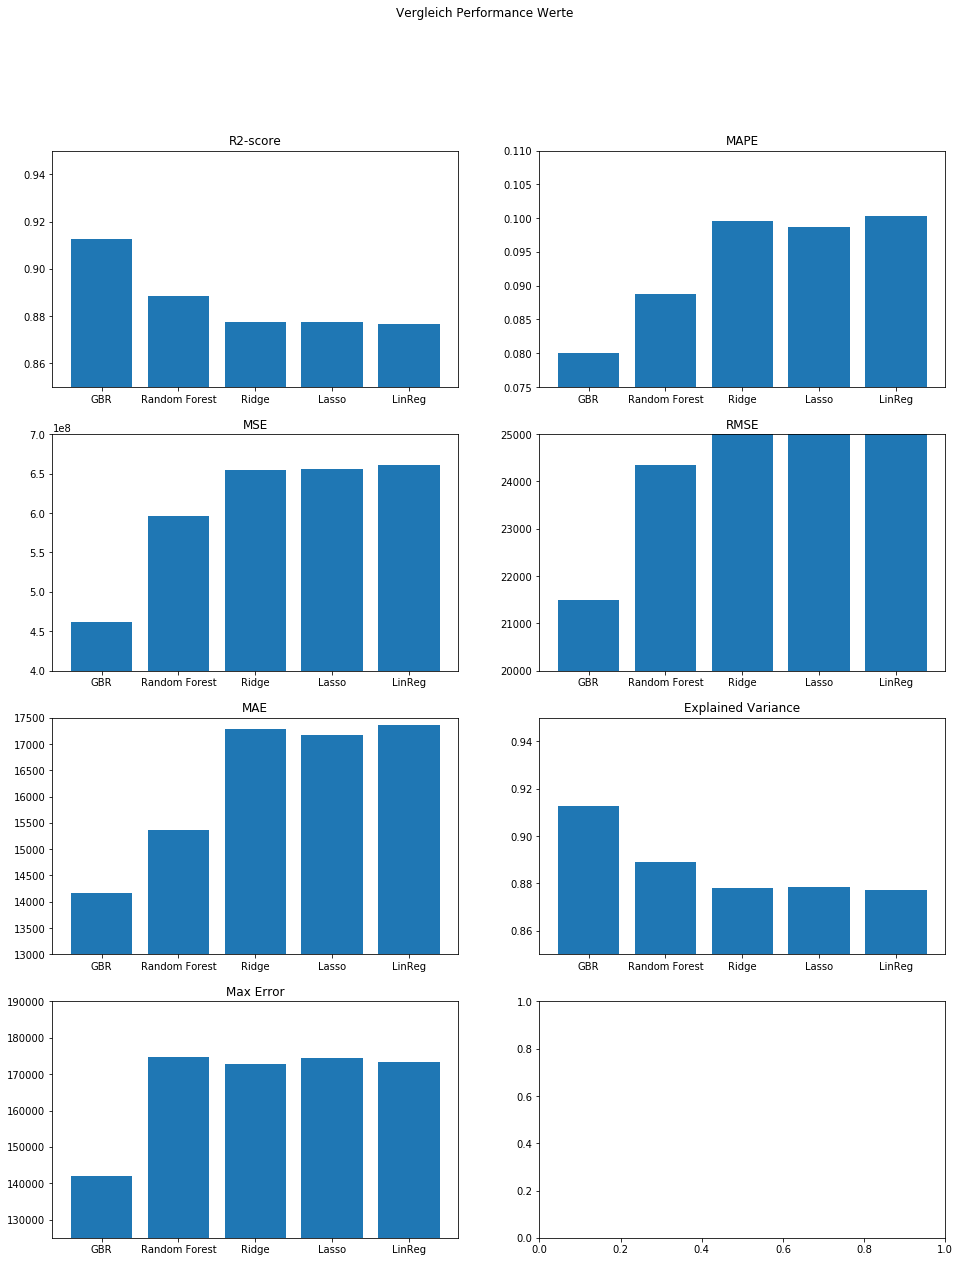

In [62]:
r2_list = []
mape_list = []
mse_list= []
rmse_list =[]
mae_list = []
expva_list = []
max_list = []

for i in [performance_gbr,performance_rafo, performance_ridge, performance_lasso, performance_linReg]:
    r2_list.append(i['mean CV score']) 
    mape_list.append(i['mean CV MAPE '])
    mse_list.append(i['mean CV MSE  '])
    rmse_list.append(i['mean CV RMSE '])
    mae_list.append(i['mean CV MAE  '])
    expva_list.append(i['mean CV Explained Variance'])
    max_list.append(i['mean CV MAX  '])
    
xs = ["GBR", "Random Forest", "Ridge", "Lasso", "LinReg"]


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, _))  = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle("Vergleich Performance Werte")

ax1.bar(xs, height=r2_list)
ax1.set_title("R2-score")
ax1.set_ylim(0.85, 0.95)

ax2.bar(xs, height=mape_list)
ax2.set_title("MAPE")
ax2.set_ylim(0.075, 0.11)

ax3.bar(xs, height=mse_list)
ax3.set_title("MSE")
ax3.set_ylim(4*10**8, 7*10**8)

ax4.bar(xs, height=rmse_list)
ax4.set_title("RMSE")
ax4.set_ylim(20000, 25000)

ax5.bar(xs, height=mae_list)
ax5.set_title("MAE")
ax5.set_ylim(13000, 17500)

ax6.bar(xs, height=expva_list)
ax6.set_title("Explained Variance")
ax6.set_ylim(0.85, 0.95)

ax7.bar(xs, height=max_list)
ax7.set_title("Max Error")
ax7.set_ylim(125000, 190000)

<a id="classification"></a>
# Modelling für Zustands-Klassifikation

## Fehlerhafte Daten entfernen
Es werden die sieben Häuser ohne Schlafzimmer gelöscht.

In [63]:
indices_Z = data_Z[data_Z['Schlafzimmer'] == 0].index
print(indices_Z)
modeling_data_Z = data_Z.drop(index=indices_Z)
print(modeling_data_Z.shape)

Int64Index([850, 939, 1069, 1095, 1381, 1526, 1975], dtype='int64')
(2826, 28)


## Encoding
Wie weiter oben erwähnt, sind einige Spalten Nominal- oder Ordinalskalen mit Strings. Diese müssen zu numerischen Werten transformiert werden.

In [64]:
# Zunächst wird im DataFrame abgespeichert, welche Werte generelle angenommen werden können.
# Diese Zuteilung ist notwendig, damit bei der One-hot Encoding auch wirklich alle Spalten generiert werden.

for c in cat_columns:
    modeling_data_Z[c] = modeling_data_Z[c].astype(CategoricalDtype(columns_val[c]))

In [65]:
# Die Spalten Heizung, Klimaanlage und Steigung werden Label-encoded.
# Auf allen anderen notwendigen Spalten wird das One-Hot Encoding eingesetzt.

modeling_data_num_Z = modeling_data_Z
heizung_dict = {'Schl':1, 'Ud':2, 'Ty':3, 'Gut':4, 'Ex':5}
modeling_data_num_Z['Heizungsqualitt'] = modeling_data_num_Z.Heizungsqualitt.map(heizung_dict)

klima_dict = {'Y':1, 'N':0}
modeling_data_num_Z['Klimaanlage'] = modeling_data_num_Z.Klimaanlage.map(klima_dict)

steigung_dict = {'Ja':1, 'Nein':0}
modeling_data_num_Z['Steigung'] = modeling_data_num_Z.Steigung.map(steigung_dict)

modeling_data_num_Z = pd.get_dummies(modeling_data_num_Z)
print(modeling_data_num_Z.shape)
modeling_data_num_Z.describe()

(2826, 74)


,Grundstück in qm,Steigung,Gebaut,Renoviert,Zustand Fassade,Kellerflche in qm,Heizungsqualitt,Klimaanlage,Erster Stock in qm,Zweiter Stock in qm,...,Heizung_GasW,Heizung_WP,Heizung_Wand,Garage Typ_2Typen,Garage Typ_Anbau,Garage Typ_TG,Garage Typ_Eingebaut,Garage Typ_CarPort,Garage Typ_Freistehend,Garage Typ_Keine
count,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,...,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000,2826.000000
mean,924.891366,0.100495,2092.187898,2106.906228,2.992923,90.660651,3.910120,0.841472,104.546355,29.942321,...,0.024062,0.005662,0.013093,0.016277,0.513447,0.013093,0.043524,0.002477,0.290517,0.120665
std,645.703715,0.300713,29.315538,21.200285,0.511759,41.314677,1.020354,0.365300,34.505008,38.232190,...,0.153270,0.075044,0.113692,0.126563,0.499908,0.113692,0.204071,0.049717,0.454081,0.325795
min,121.000000,0.000000,2005.000000,2080.000000,1.000000,0.000000,1.000000,0.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,701.250000,0.000000,2071.000000,2085.000000,3.000000,68.000000,3.000000,1.000000,80.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,878.500000,0.000000,2093.000000,2104.000000,3.000000,87.000000,4.000000,1.000000,98.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1060.750000,0.000000,2115.000000,2129.000000,3.000000,113.000000,5.000000,1.000000,123.000000,62.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,19997.000000,1.000000,2140.000000,2140.000000,5.000000,298.000000,5.000000,1.000000,355.000000,174.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Daten in Features und Output trennen (für Zustand-Klassifikation)

In [66]:
y_Z = modeling_data_num['Zustand']
X_Z = modeling_data_num.drop(columns=['Zustand', 'Preis'])
# Preis wird hier nicht berücksichtigt, 
# weil sonst die Berechnung mit ihren Zielen im Hintergrund keinen Sinn ergeben würde.

columns_Z = X_Z.columns

## Standardisieren

In [67]:
std_Z = StandardScaler()

X_Z = pd.DataFrame(std_Z.fit_transform(X_Z), columns=columns_Z)

## Daten in Traings- und Testdaten trennen
Die Daten werden in Trainings- und Testdaten getrennt.   
10 Prozent der Daten werden zu Testdaten und werden erst bei der Evaluation genutzt.  
Die Validerung findet nicht durch ein festes Validierungsset statt, sondern wird mittels Cross-Validation durchgeführt.

In [68]:
X_train_Z,X_test_Z,y_train_Z,y_test_Z = train_test_split(X_Z,y_Z,test_size=0.1,random_state=123)

### Metriken

In [69]:
def validation_class(model, X_train, y_train):
        
    return {'mean CV accuracy': cross_val_score(model, X_train, y_train, scoring='accuracy').mean(),
            "mean CV MAX": cross_val_score(model, X_train, y_train, scoring='max_error').mean() 
            # Ein ROC-AUC Score kann nicht berechnet werden, weil die Daten nicht ausreichend Datensätze haben.
            #"mean CV roc auc": cross_val_score(model, X_train, y_train, scoring='roc_auc_ovr_weighted').mean()
           }

#### Gradient Boosting Tree Classifier

In [70]:
param_grid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
              'n_estimators':[100,250,500,750,1000,1250,1500,1750],
              'max_depth':[2,3,4,5,6,7],
              'min_samples_split':[2,4,6,8,10,20,40,60,100], 
              'min_samples_leaf':[1,3,5,7,9],
              'max_features':[2,3,4,5,6,7],
              'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
}
clf = RandomizedSearchCV(GradientBoostingClassifier(random_state=123), param_grid, n_jobs=-1, scoring='accuracy', verbose=1, random_state=123)
clf.fit(X_train_Z, y_train_Z)
print(clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.6min finished


{'subsample': 0.9, 'n_estimators': 1750, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 4, 'max_depth': 2, 'learning_rate': 0.01}


In [71]:
gbc = GradientBoostingClassifier(subsample= 0.7,
 n_estimators=500,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 7,
 max_depth= 2,
 learning_rate=0.05,
 random_state=123)

gbc.fit(X_train_Z, y_train_Z)

pprint(validation_class(gbc, X_train_Z, y_train_Z))

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'mean CV accuracy': 0.5895146356265853, 'mean CV MAX': -4.0}


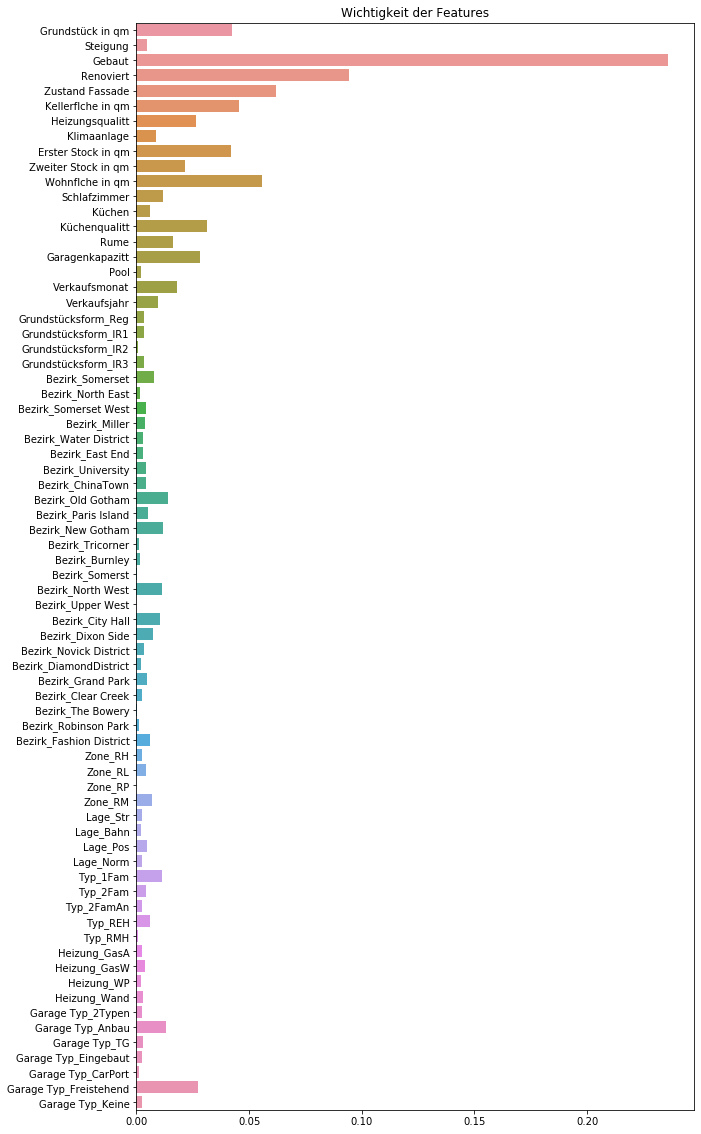

In [72]:
# get importance
importance_Z = gbc.feature_importances_

# plot feature importance
plt.figure(figsize=(10,20))
plt.title("Wichtigkeit der Features")
sns.barplot(y=X_train_Z.columns, x = importance_Z, orient='h')
plt.show()

<a id="evaluation"></a>
# Evaluation (nur Preis-Regression)

_Eine Evaluation der Zustands-Classification leuchtet den Studierenden nicht ein, da sowohl die Data Exploration als auch das Modelling gezeigt haben, dass hier keine sinnvolle Vorhersage getätigt werden kann. Man hat herausgefunden, dass man nichts hinsichtlich des Zustands herausfinden kann._  
  
Das Preis-Modell mit den besten Performance Werten ist mit Abstand der Gradient Boosting Tree Regressor.  
Im folgenden wird das Modell auf dem Test-Set abschließend evaluiert. 

## Erkenntnisse
- Die Performance-Unterschiede zwischen den Traingsdaten und den Testdaten sind sehr klein, das bedeutet, dass das Modell kaum overfittet
- Aus dem Residuen Plot kann man erkennen, dass das Modell besonders gut Preise bis 225.000 vorhersagen kann. Bei höheren Preisen wird die Vorhersage etwas ungenauer.
- Auf ungesehenen Daten liegt das Modell ungefähr 21.700 Einheiten daneben.
- Maximal lag das Modell um 74.825 Einheiten neben dem eigentlichen Preis. Jedoch sollte angemerkt werden, dass bei der Cross-Validation im Training auch ein maximaler Fehler von 141.244 auftrat.

In [73]:
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

def mean_absolute_percentage_error(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y))

print("R2:", skm.r2_score(y_test, y_pred))
print("MSE:", skm.mean_squared_error(y_test, y_pred))
print("RMSE:", skm.mean_squared_error(y_test, y_pred, squared=False))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("MAX:", skm.max_error(y_test, y_pred))

R2: 0.8866870248861021
MSE: 408451660.3810506
RMSE: 20210.187044682458
MAPE: 0.08400785797173457
MAX: 77533.65269712897


### Konfidenz des Modells quantifizieren
Dazu wird noch einmal die Kreuzvalidierung genutzt. Es wird mehrmals der R^2-Score berechnet und dessen Standardabweichung berechnet.

In [74]:
score = cross_val_score(gbr, X, y, scoring='r2', cv=10, n_jobs=-1)
print("Der Durchschnitt des R^2-Scores ist", score.mean(), "und die Standardabweichung", score.std())

Der Durchschnitt des R^2-Scores ist 0.9163147031185275 und die Standardabweichung 0.016175631160206146


### Residuen Plot

In [75]:
resids = y_test - y_pred

c:\users\philip singer\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


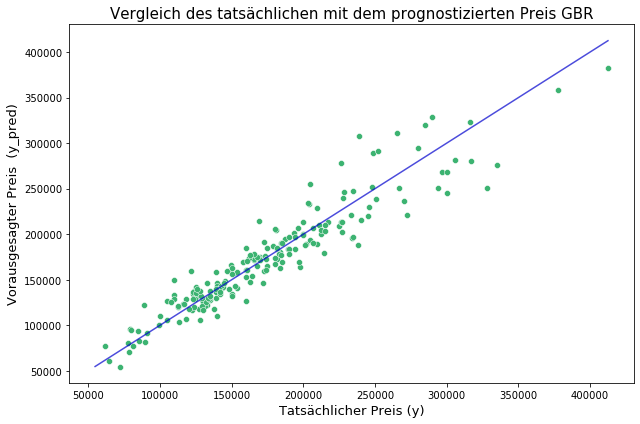

In [76]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = y_pred, color = 'mediumseagreen')
plt.title('Vergleich des tatsächlichen mit dem prognostizierten Preis GBR', fontdict = {'fontsize':15})
maxDist = max(max(y_pred), max(y_test)) 
minDist = min(min(y_pred), min(y_test)) 
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'mediumblue', alpha = 0.7) 
plt.xlabel('Tatsächlicher Preis (y)', fontdict= {'fontsize':13})
plt.ylabel('Vorausgesagter Preis  (y_pred)', fontdict= {'fontsize':13})
plt.tight_layout();

Aus dieser Darstellung können wir ersehen, dass dieses Modell nicht alle Preise gleich gut vorhersagen kann. Insbesondere scheint das Modell gut bei der Vorhersage der Preise für Immobilien innerhalb der Spanne von 100.000 bis 225.000. Das Modell schneidet bei Extremwerten möglicherweise nicht gut ab, da die Trainingsdaten für diese Fälle unzureichend sind.

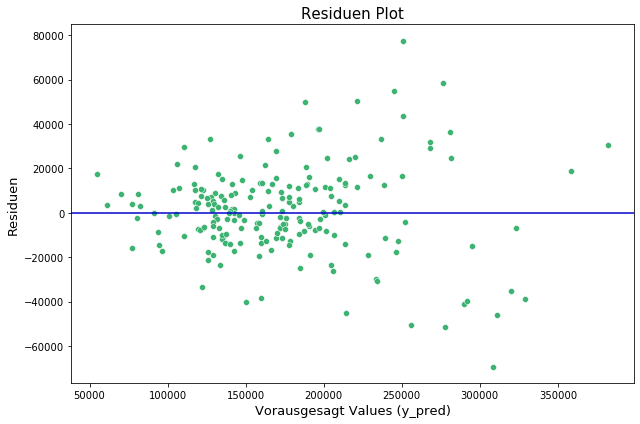

In [77]:
plt.figure(figsize=(9,6))
sns.scatterplot(x = y_pred, y = resids, color = 'mediumseagreen')
plt.axhline(0, color = 'mediumblue')
plt.title('Residuen Plot', fontdict = {'fontsize':15})
plt.xlabel('Vorausgesagt Values (y_pred)', fontdict = {'fontsize':13})
plt.ylabel('Residuen', fontdict = {'fontsize':13})
plt.tight_layout();

Die schlechte Leistung des Modells bei der Vorhersage von Werten unter 100.000 und über 250.000 wird durch diese Handlung noch verstärkt. Die Residuen nehmen bei den extremen Vorhersagewerten zu.

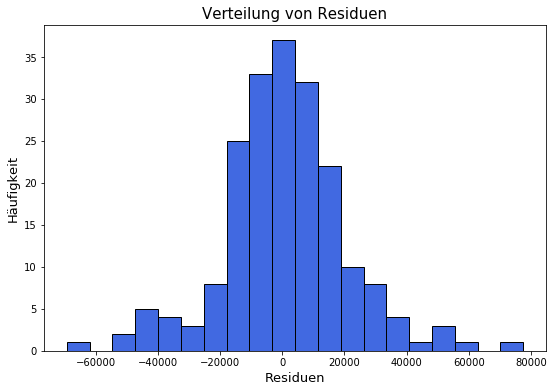

In [78]:
resids.hist(bins = 20, figsize = (9,6), edgecolor = 'black', grid = False, color = 'royalblue')
plt.title('Verteilung von Residuen', fontdict = {'fontsize':15})
plt.xlabel('Residuen', fontdict = {'fontsize':13})
plt.ylabel('Häufigkeit', fontdict = {'fontsize':13})
plt.show()

Die Verteilung der Residuen ist in etwa normal verteilt.  An beiden Enden der Verteilung gibt es einige Residuen, die darauf hinweisen, dass die Vorhersage des Modells bei einigen Ausreißern ungenau bzw. fehlerhaft ist.

<a id="inferenz"></a>
## Inferenz
### Vorgehen
Die Aussagen haben wir ermittelt in dem wir die unser Gradient Boosting Regression Modell auf die Medianwerte des Datensatzes angewendet haben und die einzelnen Parameter entsprechend der Beschreibung angepasst haben.  
  
Als ersten Schritt (Datenbereinigung) wurden fehlende Werte mit ergänzt. Nach der Bereinigung der Daten wurde eine explorative Datenanalyse (EDA) durchgeführt, um die Beziehung zwischen dem Verkaufspreis und jedem Merkmal im Modell zu untersuchen.  
  
Im Anschluss an die EDA wurden Merkmale entwickelt, um die Dimensionalität der Daten zu reduzieren und die Muster und Cluster, die während der EDA auftraten, zu berücksichtigen. Wenn eine kategoriale Variable wurden mittels onehot Encoding und Ordinal Encoding kodiert. Zur Vorbereitung der Modellierung wurden die Daten in Trainingssätze (80 % der Daten) und Testsätze (20 % der Daten) unterteilt.  
Während der Modellierung wurden fünf Modelle erstellt: Nullmodell, eine Lineare Regression mit 50 Merkmalen, Lasso-Regression mit 72 Merkmalen und mit Gradient Boosting Regression 50 Merkmalen. Es ist wichtig zu beachten, dass alle Merkmale, die im endgültigen Modell der linearen Regression enthalten sind, auf der Grundlage von EDA oder der Lasso-Regression als wichtig eingestuft wurden.  
Die Modelle wurden auf der Grundlage des R2-Scores verglichen, und das Modell mit der höchsten Punktzahl wurde für die weitere Auswertung anhand von RMSE- und Residuen-Plots ausgewählt. Auf der Grundlage des Modells mit der besten Leistung wurden Interpretationen und Empfehlungen abgegeben.

### Ergebnis
Wenn wir alle anderen Features konstant halten, erwarten wir das:

- Eine Verdoppelung der Wohnfläche führt zu etwa 16,5 % Preisanstieg.
- Eine Verdoppelung der Kellerfäche führt etwa 3 % Preisanstieg.
- Eine Verdoppelung der Wohnfläche des ersten Stockes für etwas zu 15 % Preisanstieg.
- Eine Verdoppelung der Grundstücksgröße für zu etwa 2 % Preisanstieg.
- Würde ein Haus in den Bezirk East End verlegt werden würde der Preis um etwa 15 %.
- Eine Steigerung der Garagenkapazität um eins für zu etwa 7 % Preisanstieg.
- Eine Steigerung der Küchenqualität um eins für zu etwa 5,5 % Preisanstieg
- Die Verbesserung des allgemeinen Zustands führt zu etwa 1 % Preisanstieg.


<a id="more"></a>
# Weitere Daten nutzen


Dieser Teil deint dazu, weitere Daten in Form einer gleich formatierten Datei einzulesen und den Preis eines Hauses vorherzusagen.  
Dazu muss der Datei-Pfad als String in die Variable ``path`` gespeichert werden.
Die folgenden Code-Zellen müssen in der gegebenen Reihenfolge ausgeführt werden.

## Daten Import

In [79]:
# 1
path = "DatenAusgegeben1.0.csv"

data_folder = Path(path)
data_N = pd.read_csv(data_folder, encoding='cp852', sep=";")

data_N.describe()

,Grundstück in qm,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerflche in qm,Erster Stock in qm,Zweiter Stock in qm,Wohnflche in qm,Schlafzimmer,Küchen,Küchenqualitt,Rume,Garagenkapazitt,Pool,Verkaufsmonat,Verkaufsjahr,Preis
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,9.000000,2000.000000,2000.000000,2000.000000
mean,950.054000,5.697500,2099.031000,2113.344500,3.102500,96.140500,106.48100,31.125000,137.990000,2.883000,1.042000,3.456500,6.405000,1.735500,2.444444,6.102500,2137.856500,176791.811500
std,737.437654,1.129439,29.120114,20.168198,0.386094,38.249893,34.40918,39.461551,45.565953,0.817095,0.203117,0.632699,1.523856,0.736757,1.130388,2.628773,1.304131,72060.407925
min,121.000000,1.000000,2005.000000,2080.000000,1.000000,0.000000,31.00000,0.000000,31.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2136.000000,39300.000000
25%,701.750000,5.000000,2083.000000,2095.000000,3.000000,74.000000,82.00000,0.000000,102.000000,2.000000,1.000000,3.000000,5.000000,1.000000,2.000000,4.000000,2137.000000,130000.000000
50%,887.000000,5.000000,2101.000000,2121.000000,3.000000,91.000000,99.00000,0.000000,133.000000,3.000000,1.000000,3.000000,6.000000,2.000000,2.000000,6.000000,2138.000000,158225.000000
75%,1078.000000,6.000000,2126.000000,2132.000000,3.000000,117.000000,126.00000,65.000000,161.000000,3.000000,1.000000,4.000000,7.000000,2.000000,3.000000,7.000000,2139.000000,207000.000000
max,19997.000000,9.000000,2140.000000,2140.000000,5.000000,298.000000,355.00000,174.000000,401.000000,6.000000,3.000000,5.000000,13.000000,4.000000,4.000000,12.000000,2140.000000,755000.000000


## Daten Vorbereiten

In [80]:
# 2
data_N['Pool'].fillna(0, inplace=True) #ersetze Na durch Null (Haus besitzt wahrscheinlich keinen Pool)

In [81]:
# 3
data_N['Garage Typ'].fillna("Keine", inplace=True) #ersetze Na durch 'keine' (Haus besitzt wahrscheinlich keine Garage)

### Encoding

In [82]:
# 4 
modeling_data_N = data_N

# Zunächst wird im DataFrame abgespeichert, welche Werte generelle angenommen werden können.
# Diese Zuteilung ist notwendig, damit bei der One-hot Encoding auch wirklich alle Spalten generiert werden.

for c in cat_columns:
    modeling_data_N[c] = modeling_data_N[c].astype(CategoricalDtype(columns_val[c]))

# Die Spalten Heizung, Klimaanlage und Steigung werden Label-encoded.
# Auf allen anderen notwendigen Spalten wird das One-Hot Encoding eingesetzt.

modeling_data_num_N = modeling_data_N
heizung_dict = {'Schl':1, 'Ud':2, 'Ty':3, 'Gut':4, 'Ex':5}
modeling_data_num_N['Heizungsqualitt'] = modeling_data_num_N.Heizungsqualitt.map(heizung_dict)

klima_dict = {'Y':1, 'N':0}
modeling_data_num_N['Klimaanlage'] = modeling_data_num_N.Klimaanlage.map(klima_dict)

steigung_dict = {'Ja':1, 'Nein':0}
modeling_data_num_N['Steigung'] = modeling_data_num_N.Steigung.map(steigung_dict)

modeling_data_num_N = pd.get_dummies(modeling_data_num_N)
print(modeling_data_num_N.shape)
modeling_data_num_N.describe()

(2000, 74)


,Grundstück in qm,Steigung,Zustand,Gebaut,Renoviert,Zustand Fassade,Kellerflche in qm,Heizungsqualitt,Klimaanlage,Erster Stock in qm,...,Heizung_GasW,Heizung_WP,Heizung_Wand,Garage Typ_2Typen,Garage Typ_Anbau,Garage Typ_TG,Garage Typ_Eingebaut,Garage Typ_CarPort,Garage Typ_Freistehend,Garage Typ_Keine
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000
mean,950.054000,0.097500,5.697500,2099.031000,2113.344500,3.102500,96.140500,4.118000,0.944500,106.48100,...,0.010000,0.00250,0.002000,0.006000,0.600500,0.010000,0.058500,0.00250,0.274500,0.04800
std,737.437654,0.296712,1.129439,29.120114,20.168198,0.386094,38.249893,0.947378,0.229011,34.40918,...,0.099524,0.04995,0.044688,0.077246,0.489918,0.099524,0.234745,0.04995,0.446374,0.21382
min,121.000000,0.000000,1.000000,2005.000000,2080.000000,1.000000,0.000000,1.000000,0.000000,31.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,701.750000,0.000000,5.000000,2083.000000,2095.000000,3.000000,74.000000,3.000000,1.000000,82.00000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,887.000000,0.000000,5.000000,2101.000000,2121.000000,3.000000,91.000000,4.000000,1.000000,99.00000,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,1078.000000,0.000000,6.000000,2126.000000,2132.000000,3.000000,117.000000,5.000000,1.000000,126.00000,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.00000
max,19997.000000,1.000000,9.000000,2140.000000,2140.000000,5.000000,298.000000,5.000000,1.000000,355.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000


## Daten in Features und Output trennen

In [83]:
# 5
# Aufteilung für Lineare Regression, Ridge Regression und Gradient Boosting Regressor
y_N = modeling_data_num_N['Preis']
## Selektion der Feature, aufgrundlage der Lasso Regression siehe Unten
columns = ['Grundstück in qm', 'Steigung', 'Zustand', 'Gebaut', 'Renoviert',
       'Zustand Fassade', 'Kellerflche in qm', 'Heizungsqualitt',
       'Klimaanlage', 'Erster Stock in qm', 'Zweiter Stock in qm',
       'Wohnflche in qm', 'Schlafzimmer', 'Küchen', 'Küchenqualitt', 'Rume',
       'Garagenkapazitt', 'Pool', 'Verkaufsmonat', 'Verkaufsjahr',
       'Grundstücksform_Reg', 'Grundstücksform_IR1', 'Grundstücksform_IR2',
       'Grundstücksform_IR3', 'Bezirk_Somerset', 'Bezirk_North East',
       'Bezirk_Somerset West', 'Bezirk_Miller', 'Bezirk_Water District',
       'Bezirk_East End', 'Bezirk_University', 'Bezirk_ChinaTown',
       'Bezirk_Old Gotham', 'Bezirk_Paris Island', 'Bezirk_New Gotham',
       'Bezirk_Tricorner', 'Bezirk_Burnley', 'Bezirk_Somerst',
       'Bezirk_North West', 'Bezirk_Upper West', 'Bezirk_City Hall',
       'Bezirk_Dixon Side', 'Bezirk_Novick District', 'Bezirk_DiamondDistrict',
       'Bezirk_Grand Park', 'Bezirk_Clear Creek', 'Bezirk_The Bowery',
       'Bezirk_Robinson Park', 'Bezirk_Fashion District', 'Zone_RH', 'Zone_RL',
       'Zone_RP', 'Zone_RM', 'Lage_Str', 'Lage_Bahn', 'Lage_Pos', 'Lage_Norm',
       'Typ_1Fam', 'Typ_2Fam', 'Typ_2FamAn', 'Typ_REH', 'Typ_RMH',
       'Heizung_GasA', 'Heizung_GasW', 'Heizung_WP', 'Heizung_Wand',
       'Garage Typ_2Typen', 'Garage Typ_Anbau', 'Garage Typ_TG',
       'Garage Typ_Eingebaut', 'Garage Typ_CarPort', 'Garage Typ_Freistehend',
       'Garage Typ_Keine']

X_N = modeling_data_num_N[columns]

## Daten Standardisieren

In [84]:
# 6
X_N = pd.DataFrame(std.transform(X_N), columns=columns)

## Preis vorhersagen

In [85]:
# 7
y_pred = gbr.predict(X_N)

def mean_absolute_percentage_error(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y))

print("R2:", skm.r2_score(y_N, y_pred))
print("MSE:", skm.mean_squared_error(y_N, y_pred))
print("RMSE:", skm.mean_squared_error(y_N, y_pred, squared=False))
print("MAPE:", mean_absolute_percentage_error(y_N, y_pred))
print("MAX:", skm.max_error(y_N, y_pred))

R2: 0.9654421086910191
MSE: 179359120.3818551
RMSE: 13392.502394319557
MAPE: 0.056975737294469454
MAX: 77533.65269712897


In [86]:
#8
print(y_pred)

[165459.56870576 332829.5224073  133224.24680968 ... 113110.60781989
 286997.15258043 147173.51780706]
